![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Basic information about the data
crimes.info()

# Summary statistics of the dataset
crimes.describe()

# Check for missing values in the dataset
missing_values = crimes.isnull().sum()
print("Missing values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB
Missing values:
 DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC           

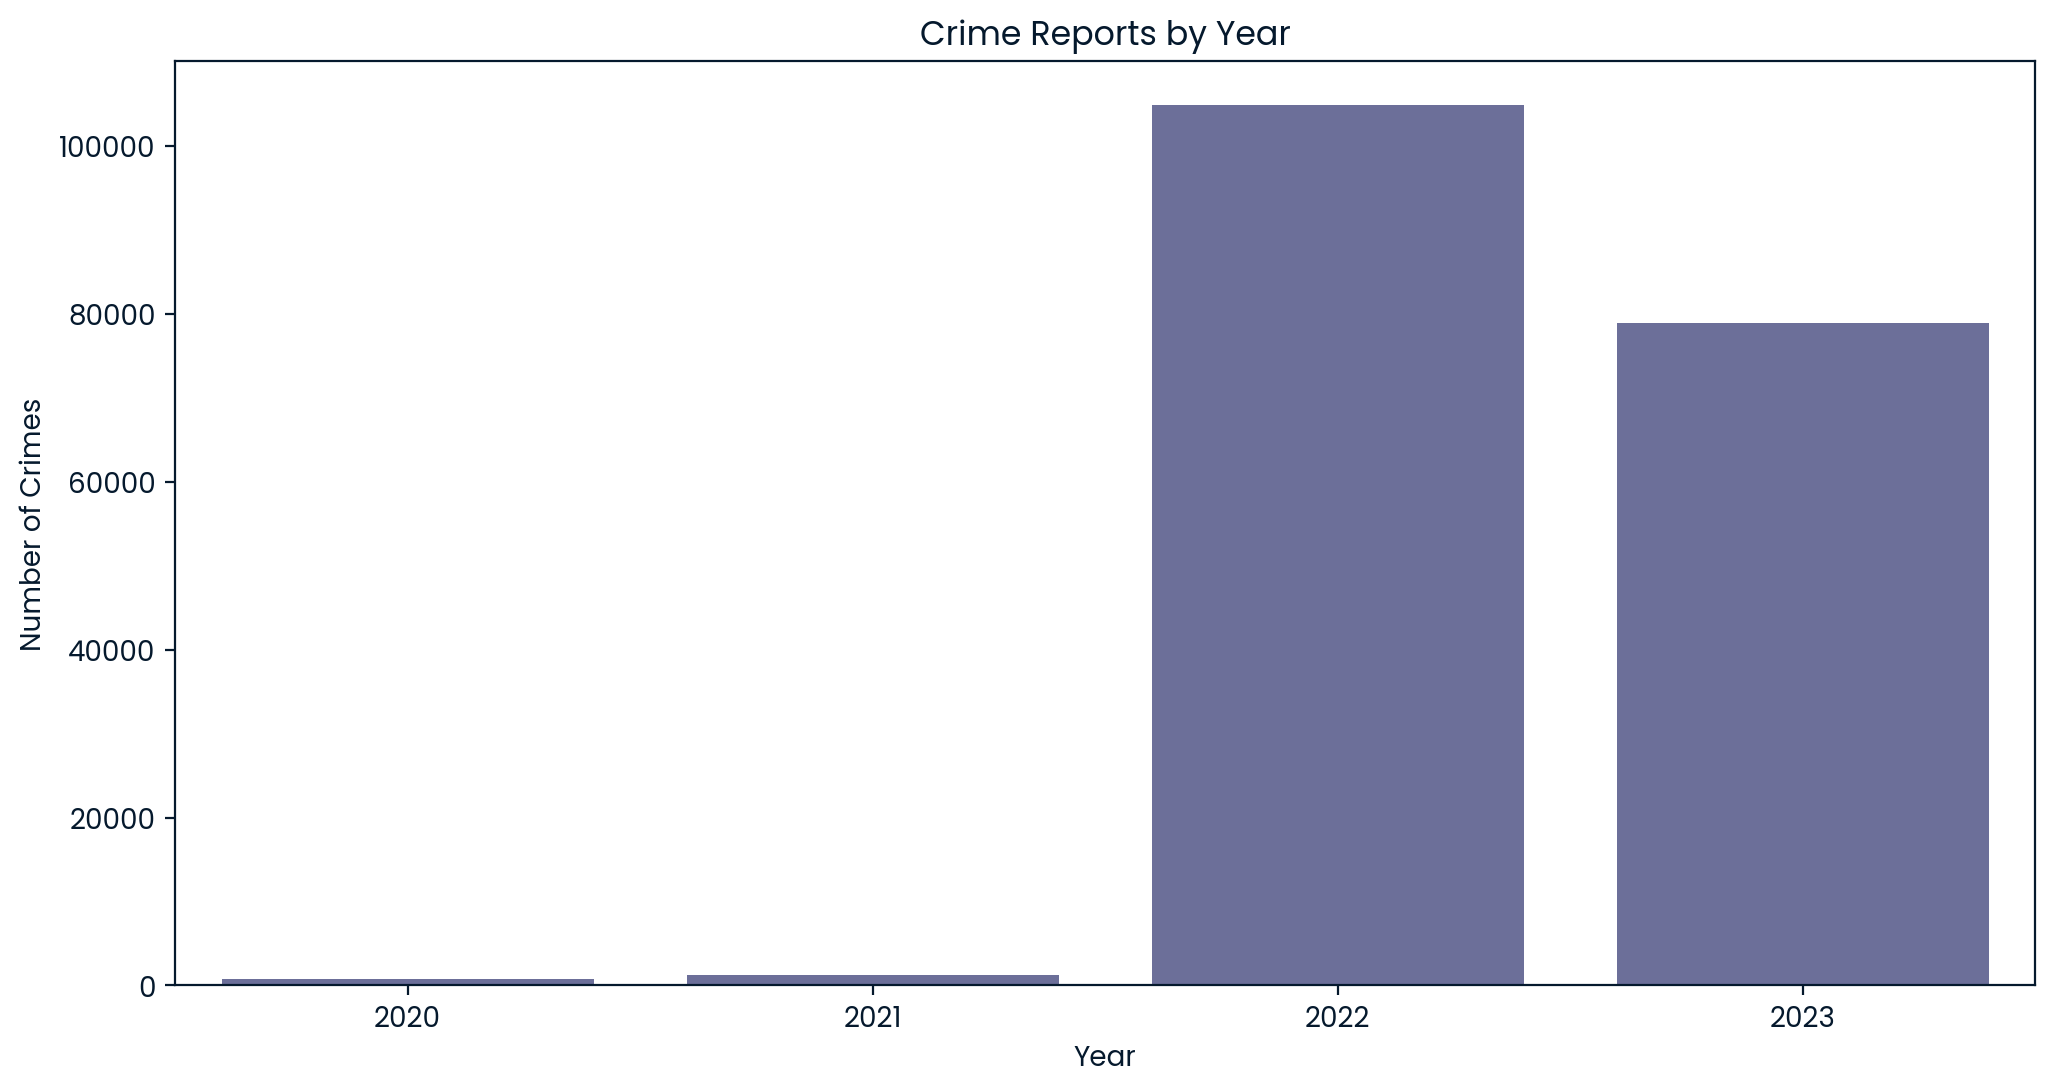

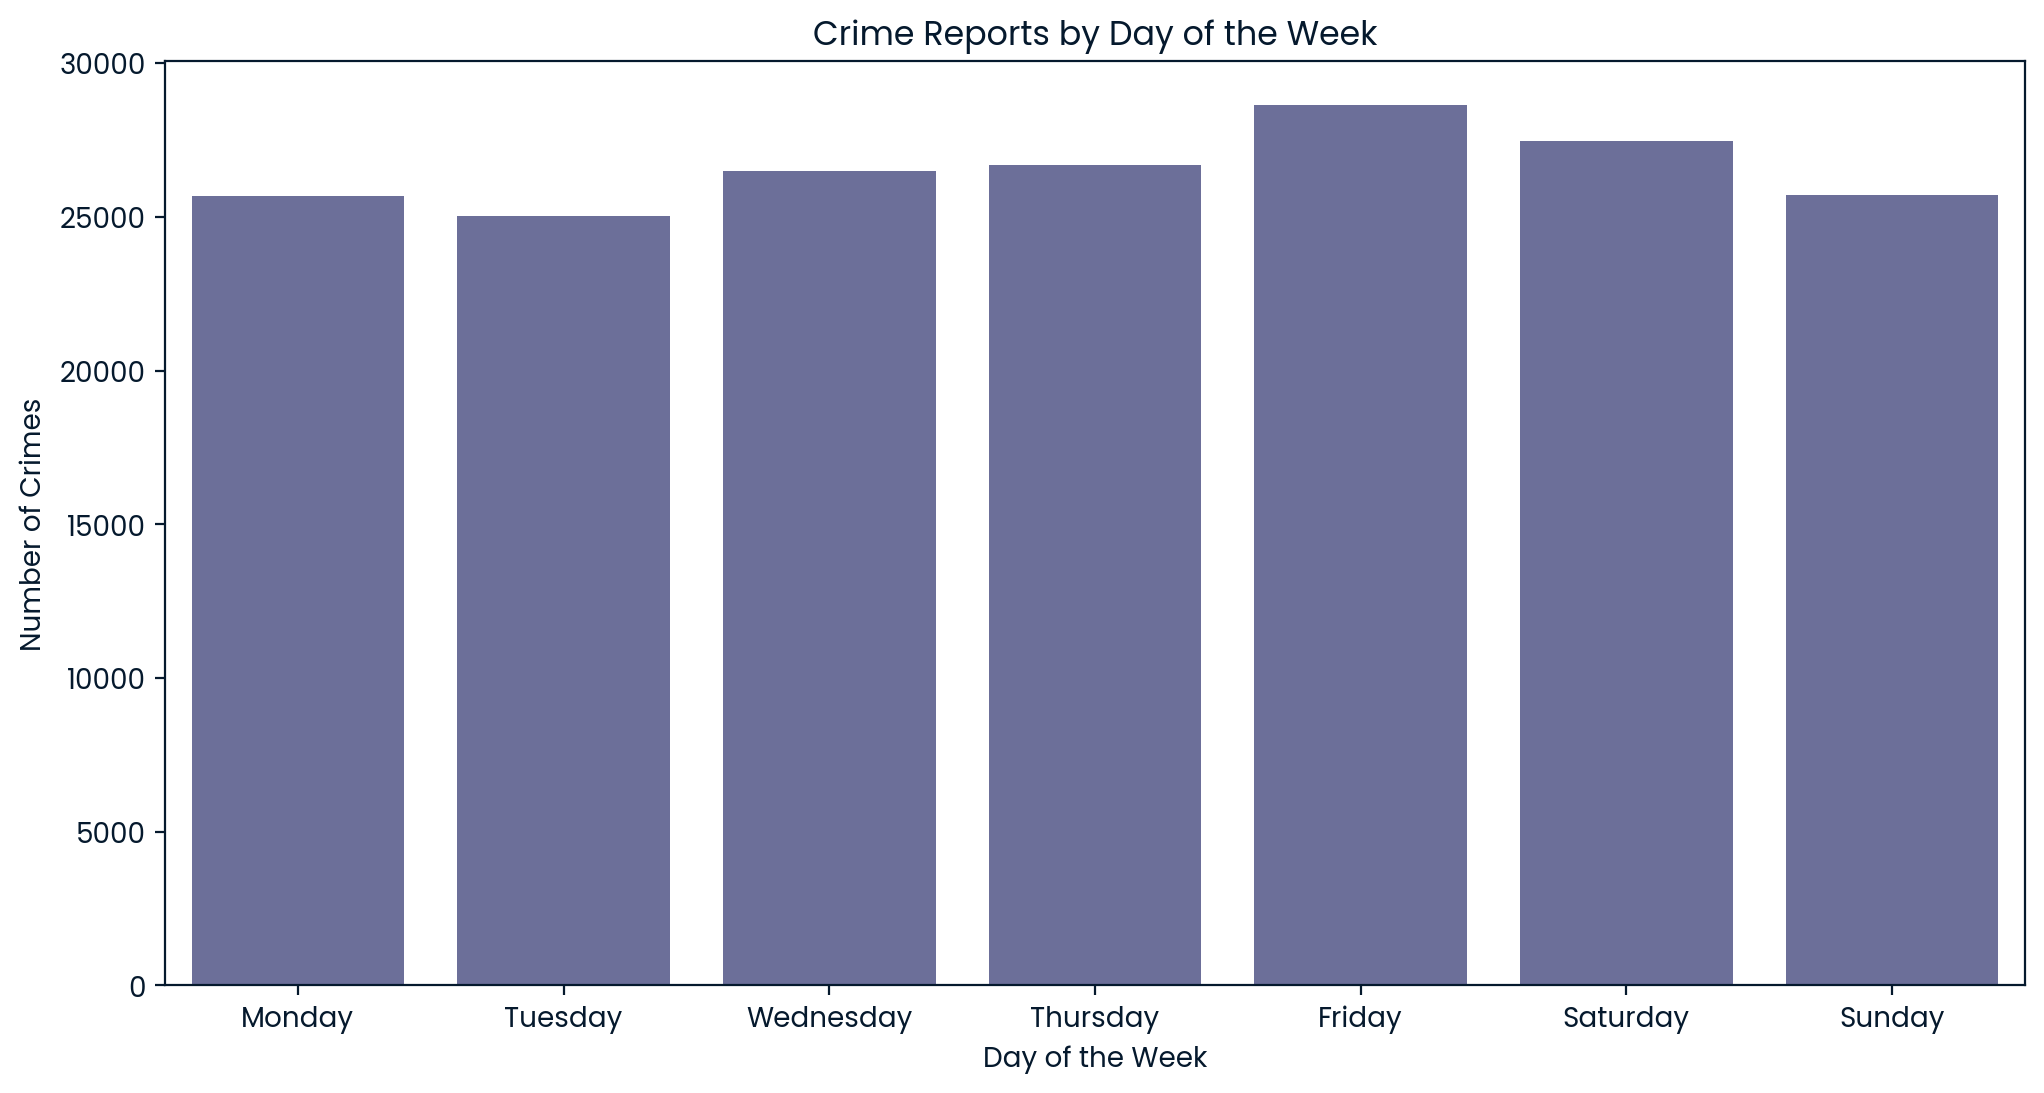

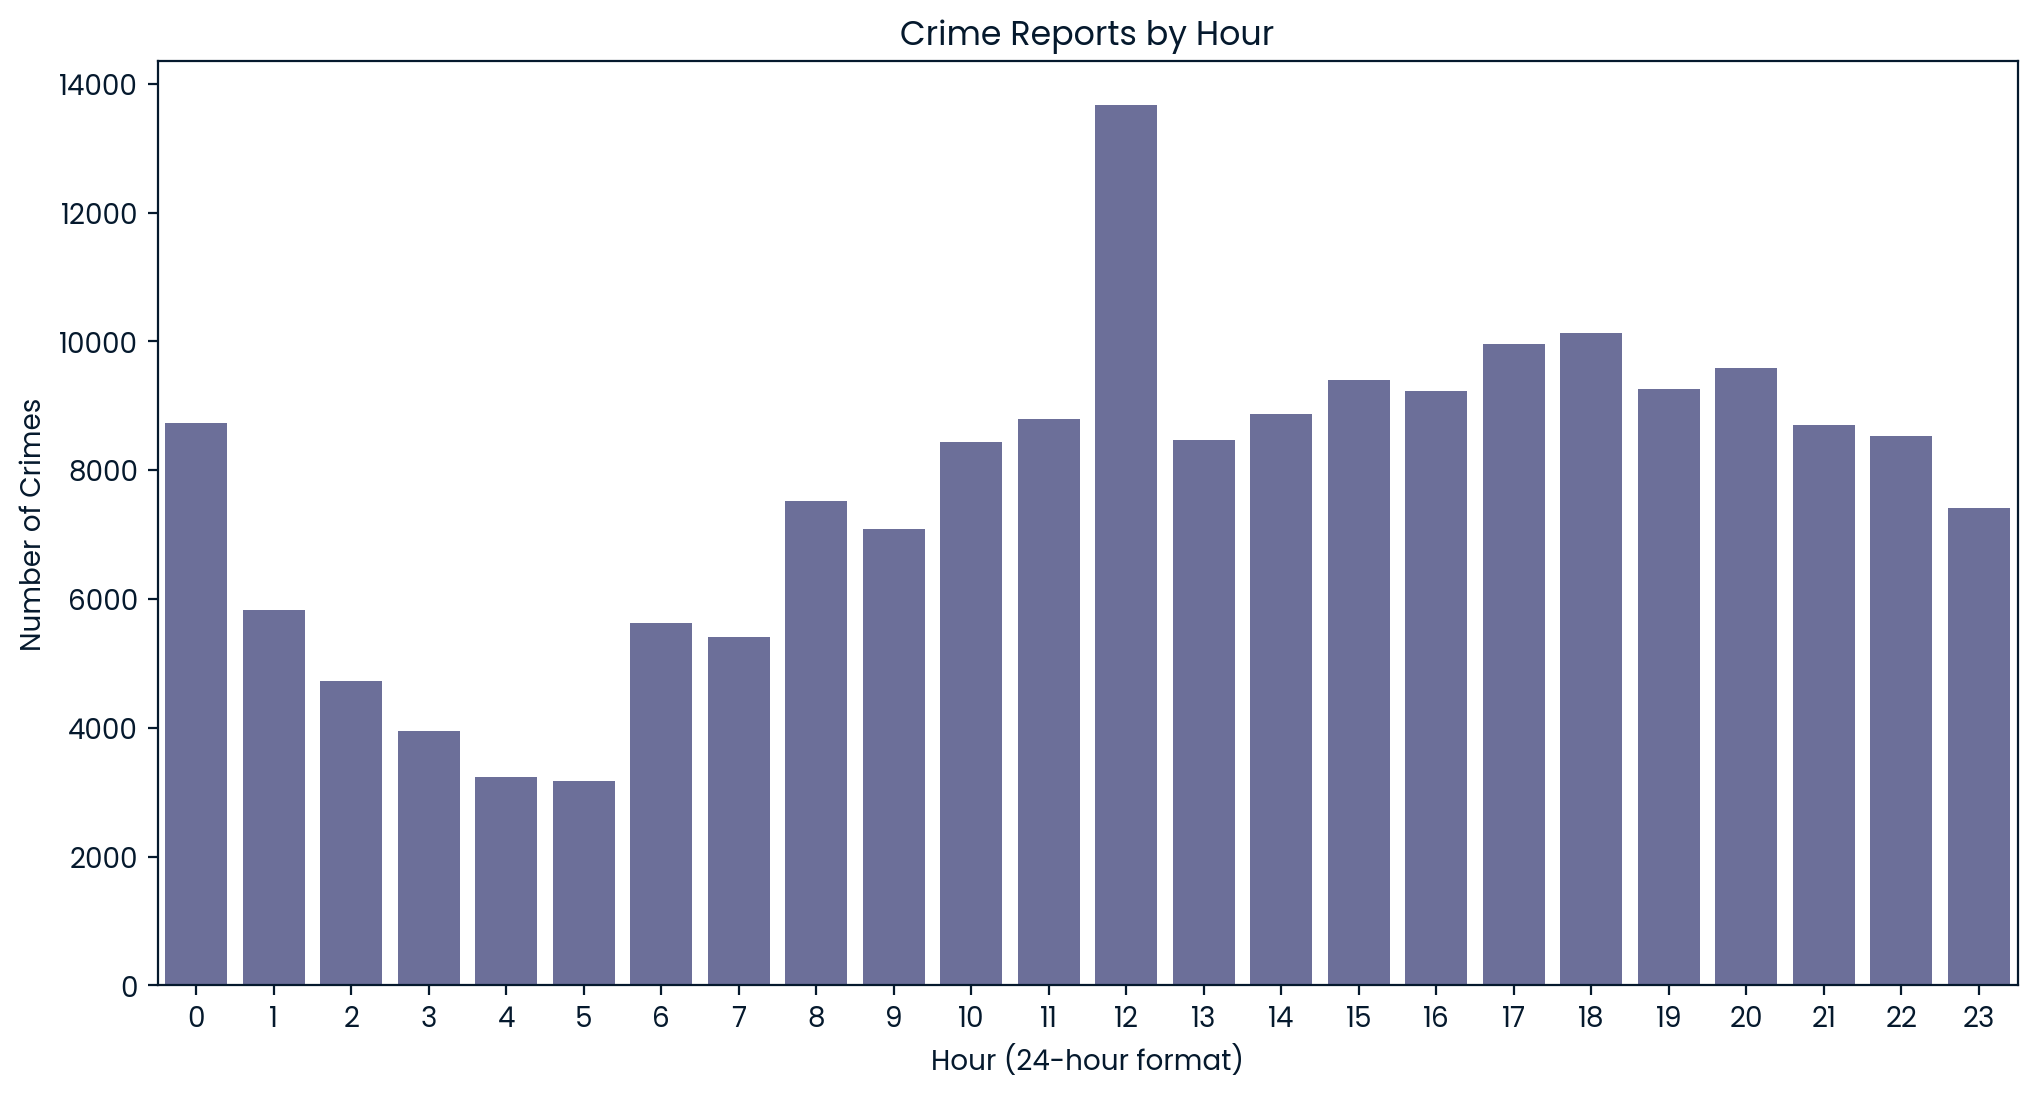

In [3]:
# Extract useful time information
crimes['Year'] = crimes['DATE OCC'].dt.year
crimes['Month'] = crimes['DATE OCC'].dt.month
crimes['DayOfWeek'] = crimes['DATE OCC'].dt.day_name()
crimes['Hour'] = crimes['TIME OCC'].str[:2].astype(int)  # Extract hour from time

# Plotting crime distribution by year
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x='Year')
plt.title('Crime Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

# Crime distribution by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Reports by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

# Crime distribution by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x='Hour')
plt.title('Crime Reports by Hour')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Crimes')
plt.show()


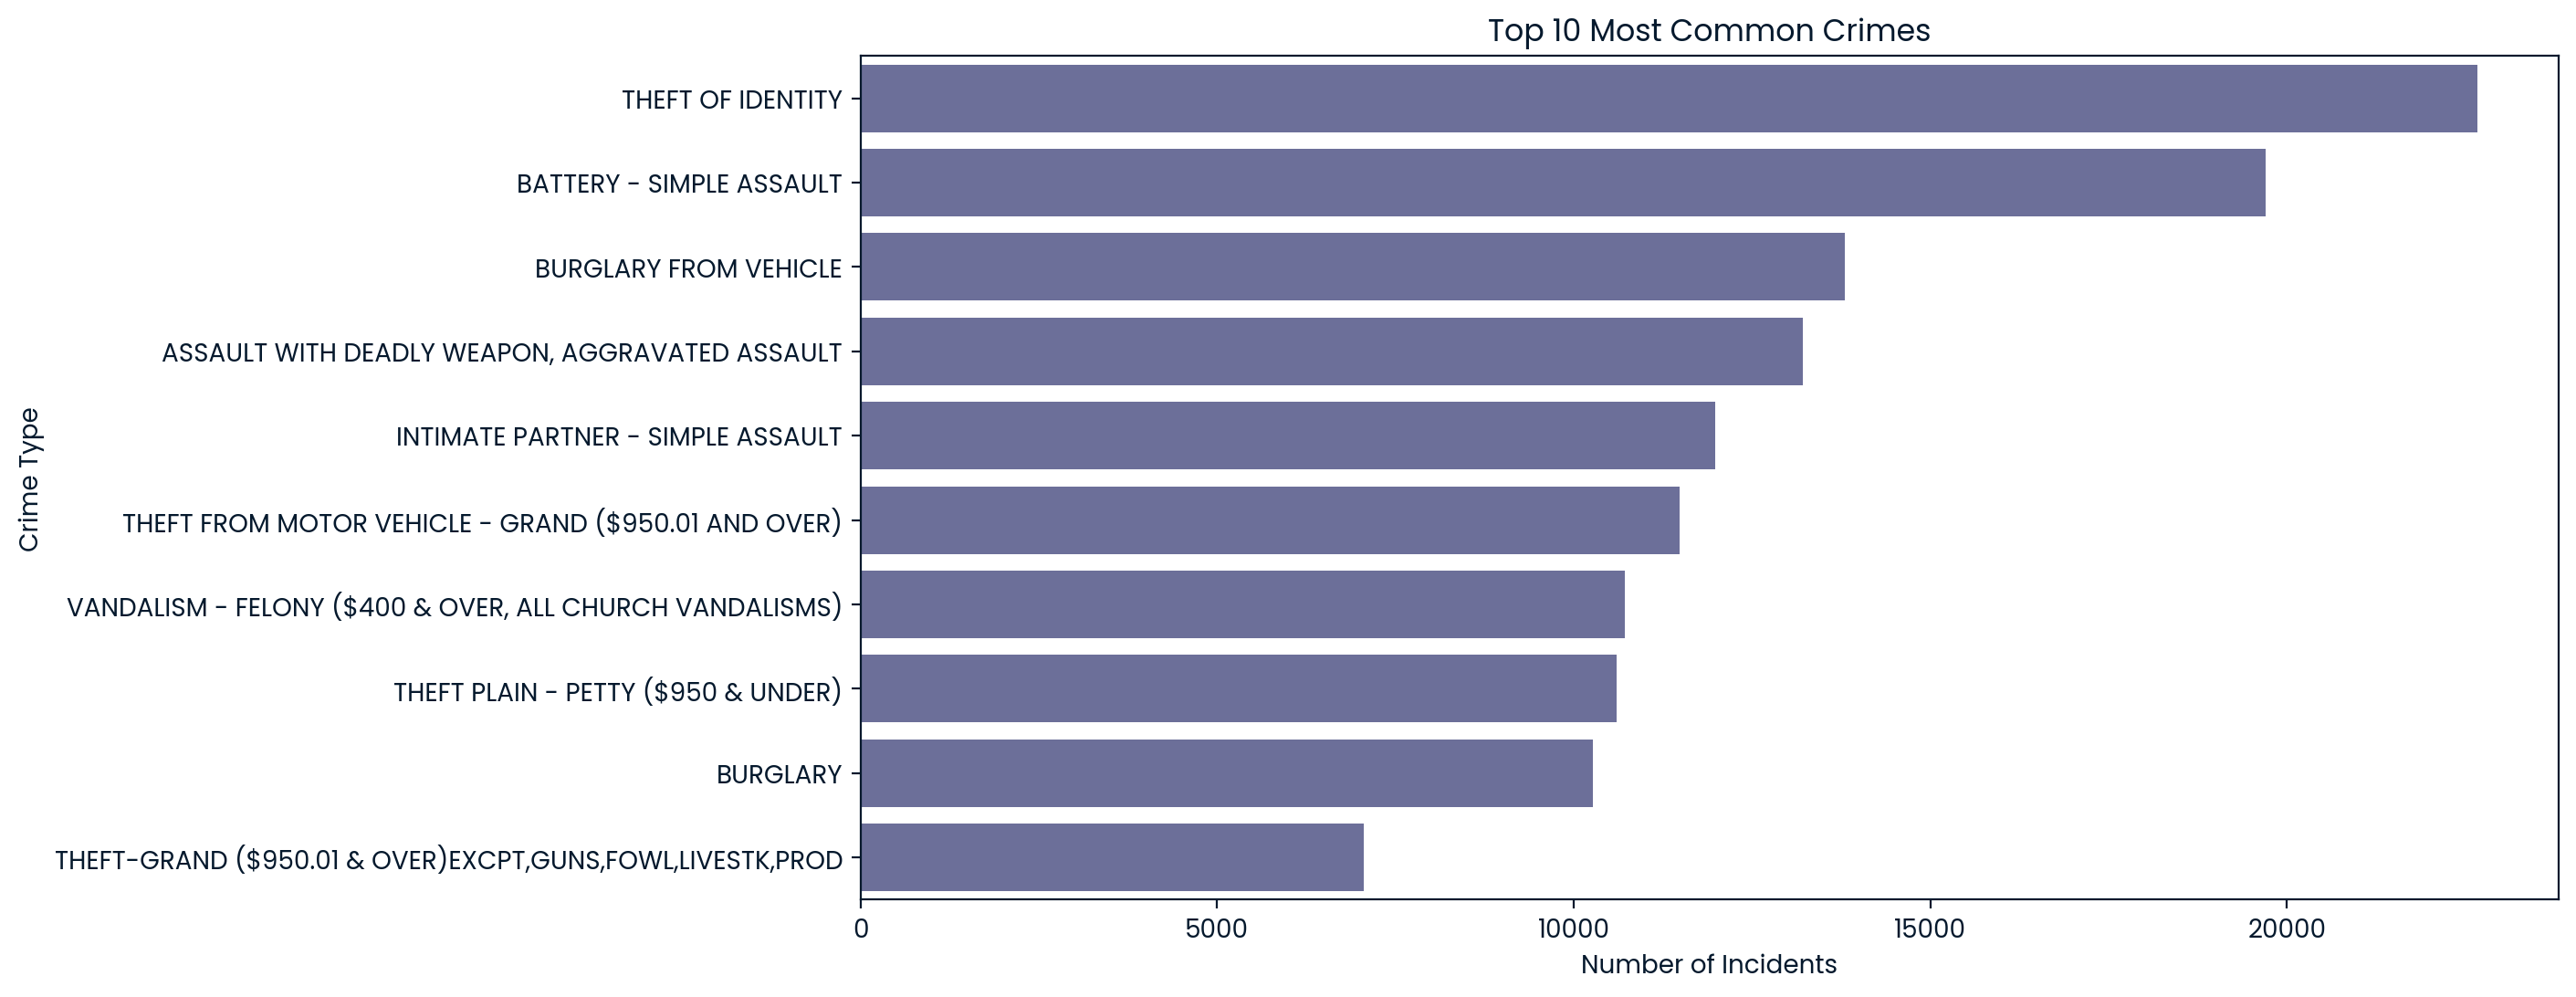

In [4]:
# Top 10 most common crimes
top_crimes = crimes['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_crimes.index, x=top_crimes.values)
plt.title('Top 10 Most Common Crimes')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()


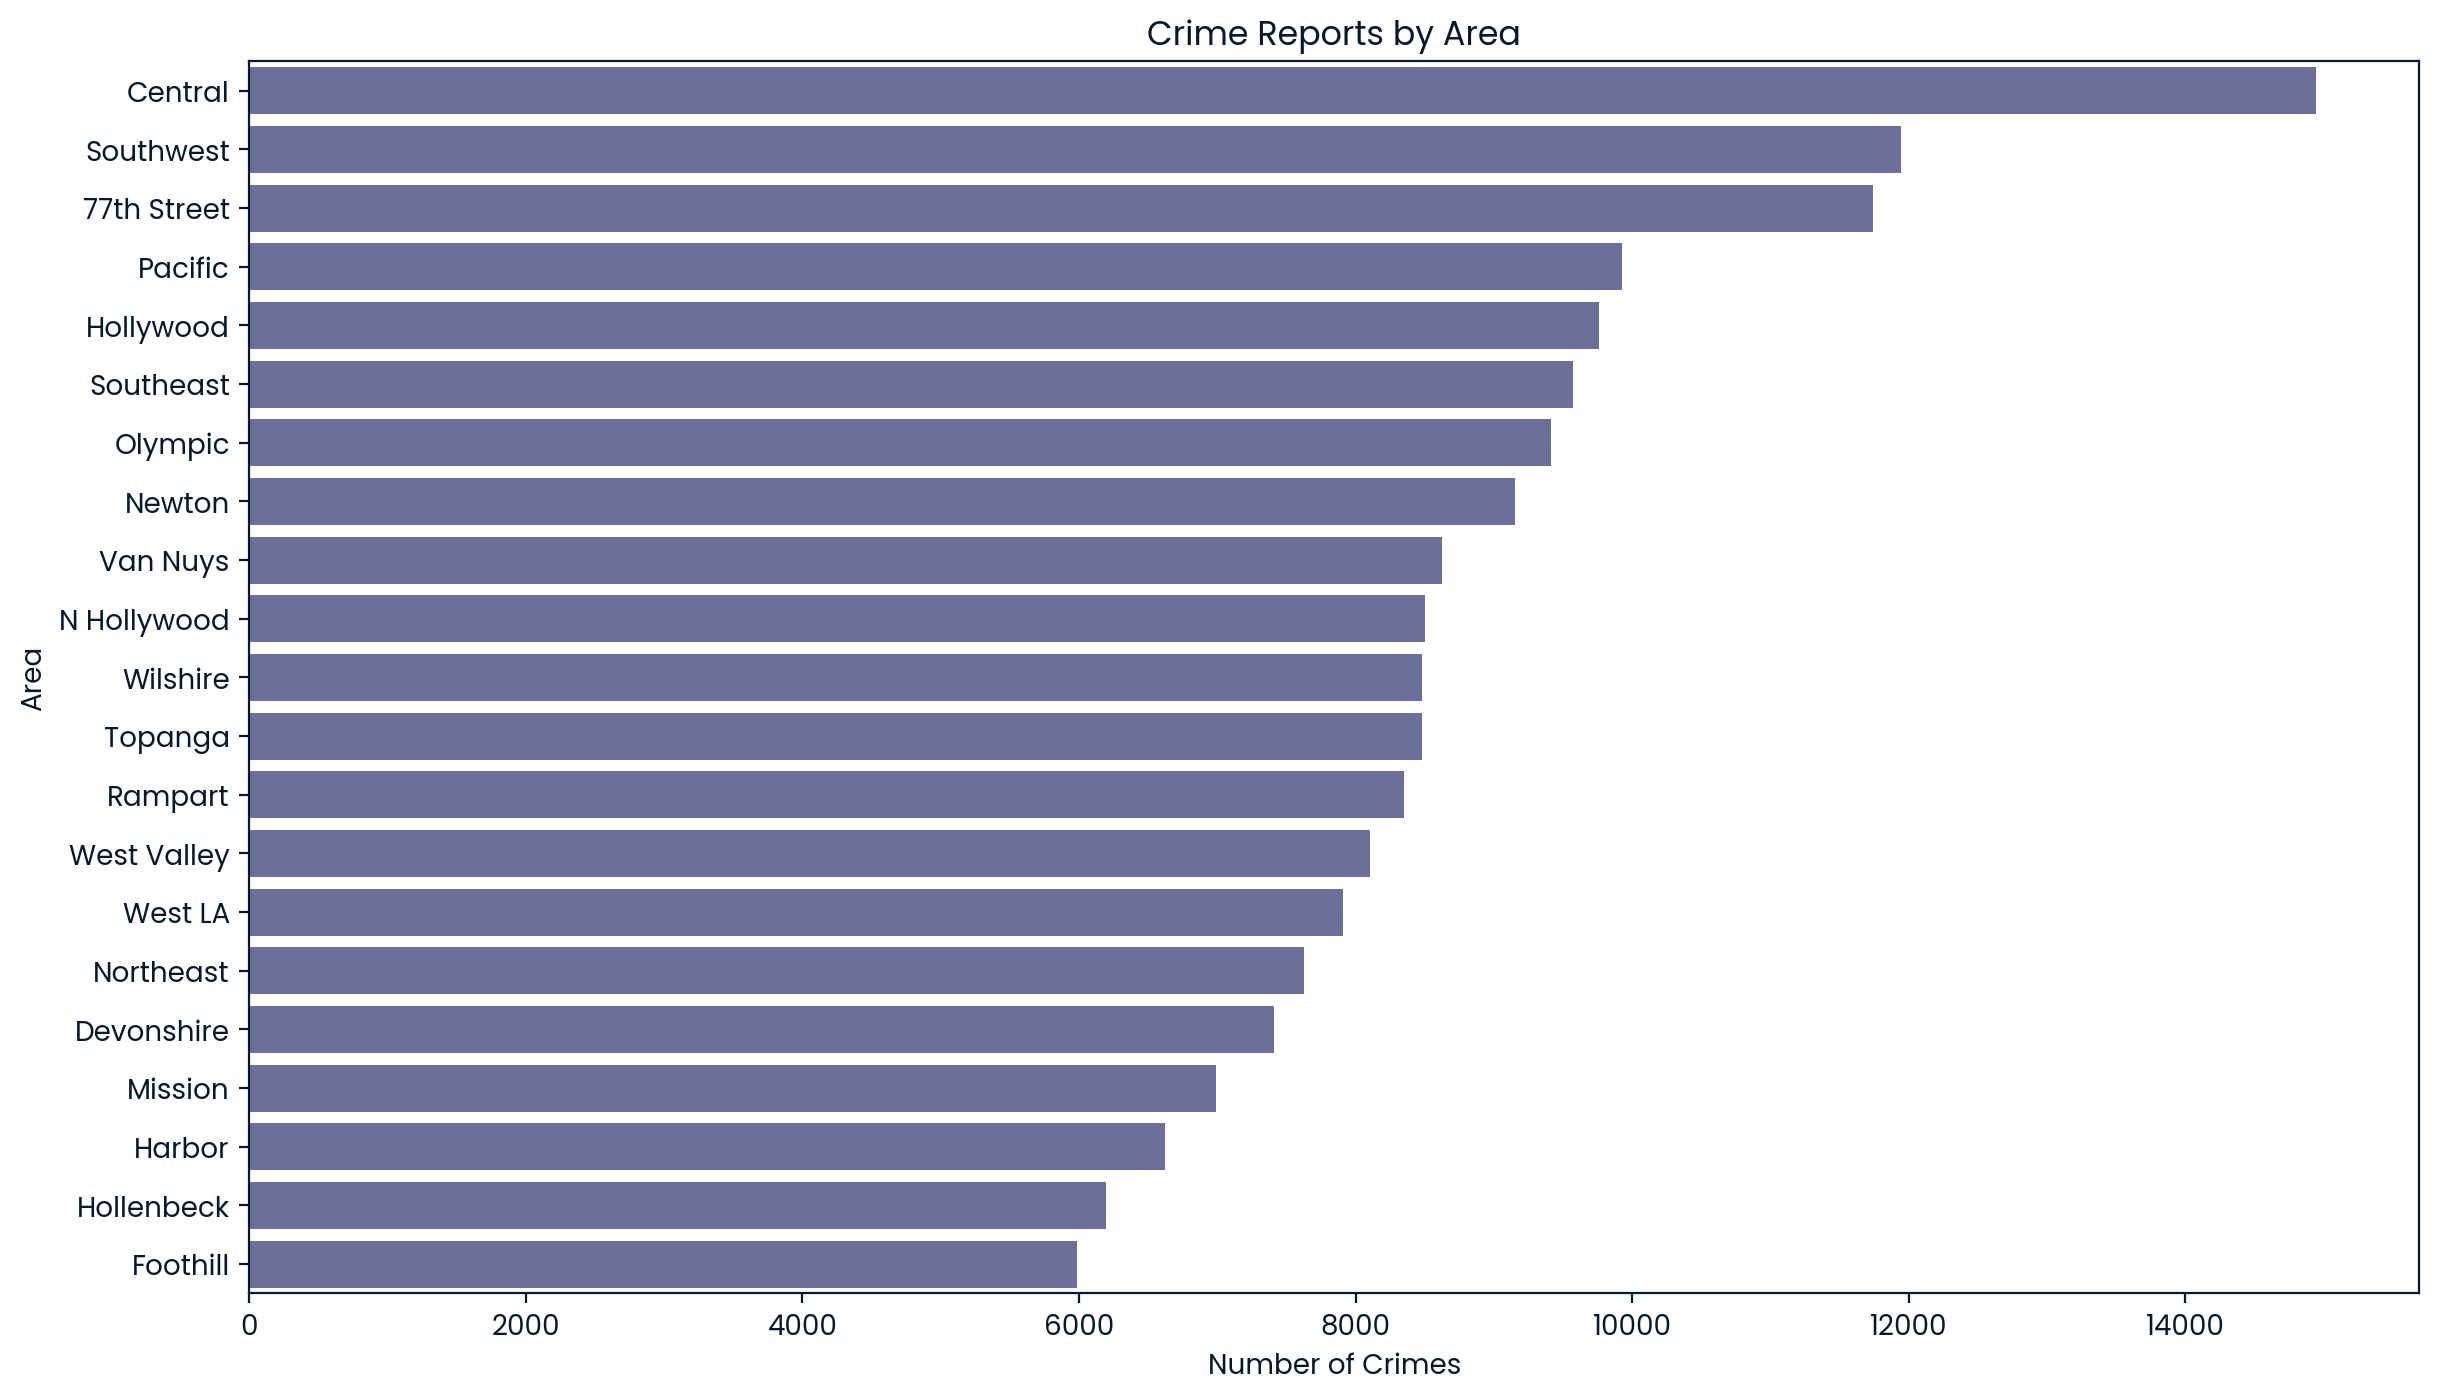

In [5]:
# Crime distribution by area
plt.figure(figsize=(14, 8))
sns.countplot(data=crimes, y='AREA NAME', order=crimes['AREA NAME'].value_counts().index)
plt.title('Crime Reports by Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area')
plt.show()


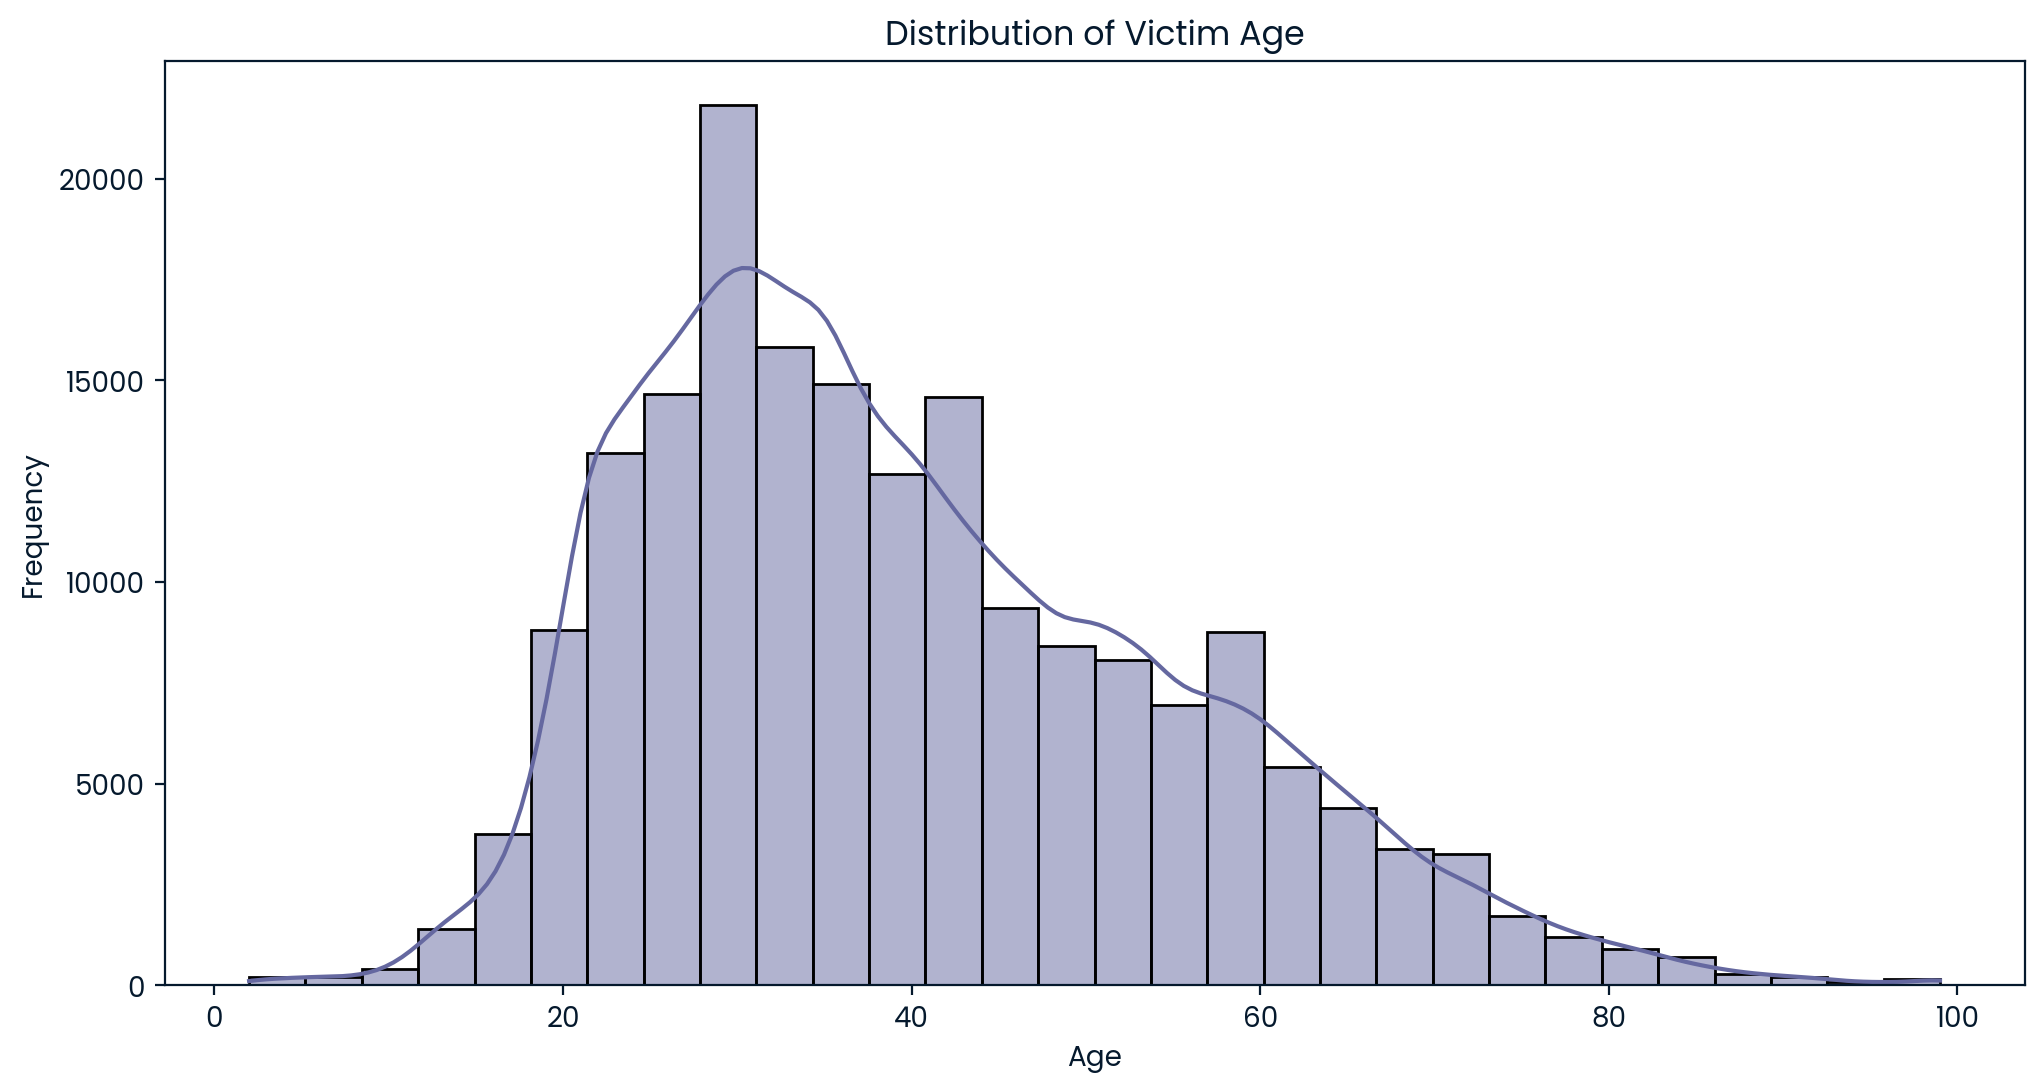

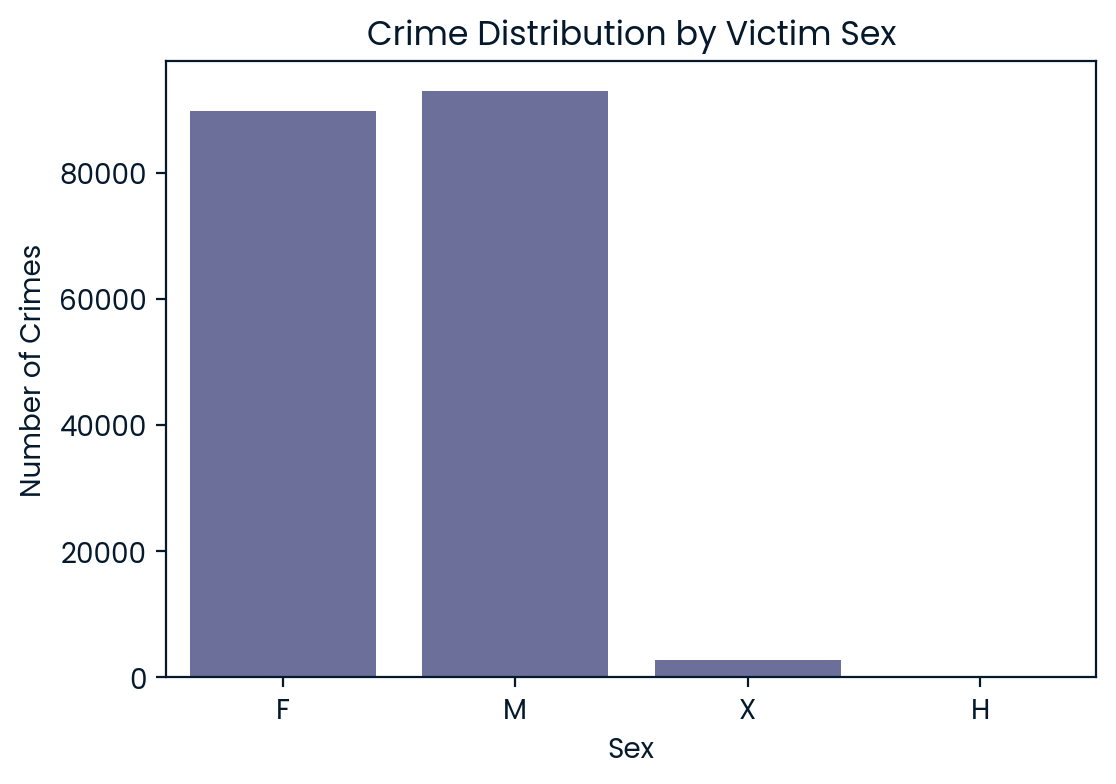

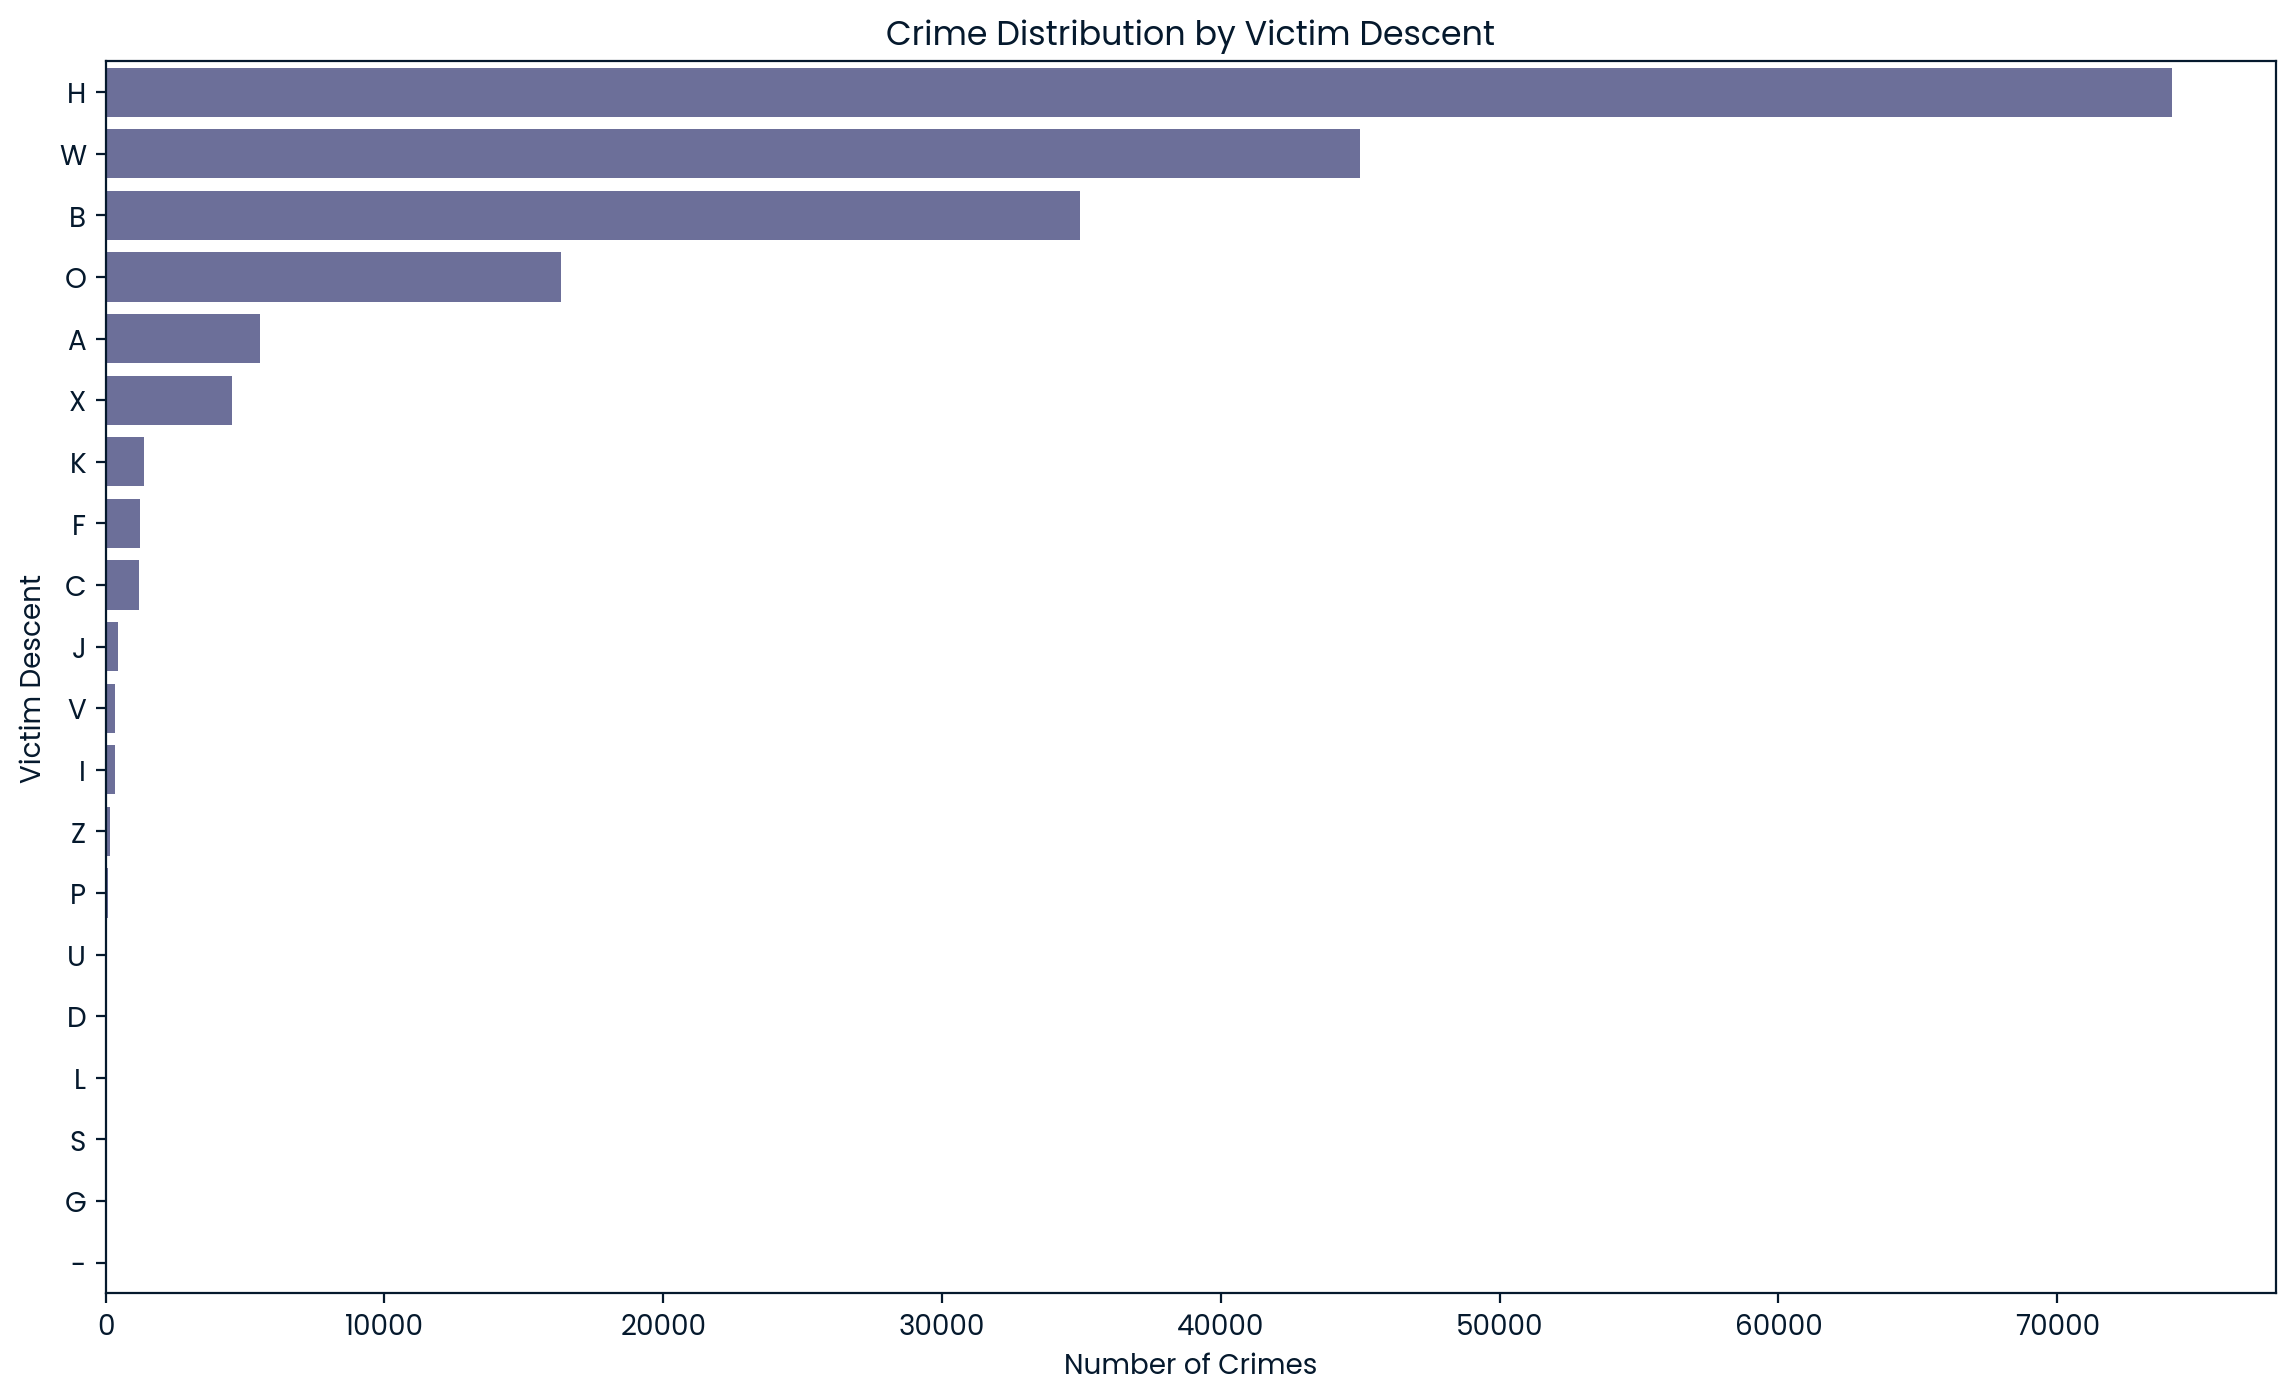

In [6]:
# Age distribution of victims
plt.figure(figsize=(12, 6))
sns.histplot(crimes['Vict Age'], bins=30, kde=True)
plt.title('Distribution of Victim Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Crime distribution by victim's sex
plt.figure(figsize=(6, 4))
sns.countplot(data=crimes, x='Vict Sex')
plt.title('Crime Distribution by Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Crimes')
plt.show()

# Crime distribution by victim descent
plt.figure(figsize=(14, 8))
sns.countplot(data=crimes, y='Vict Descent', order=crimes['Vict Descent'].value_counts().index)
plt.title('Crime Distribution by Victim Descent')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Descent')
plt.show()


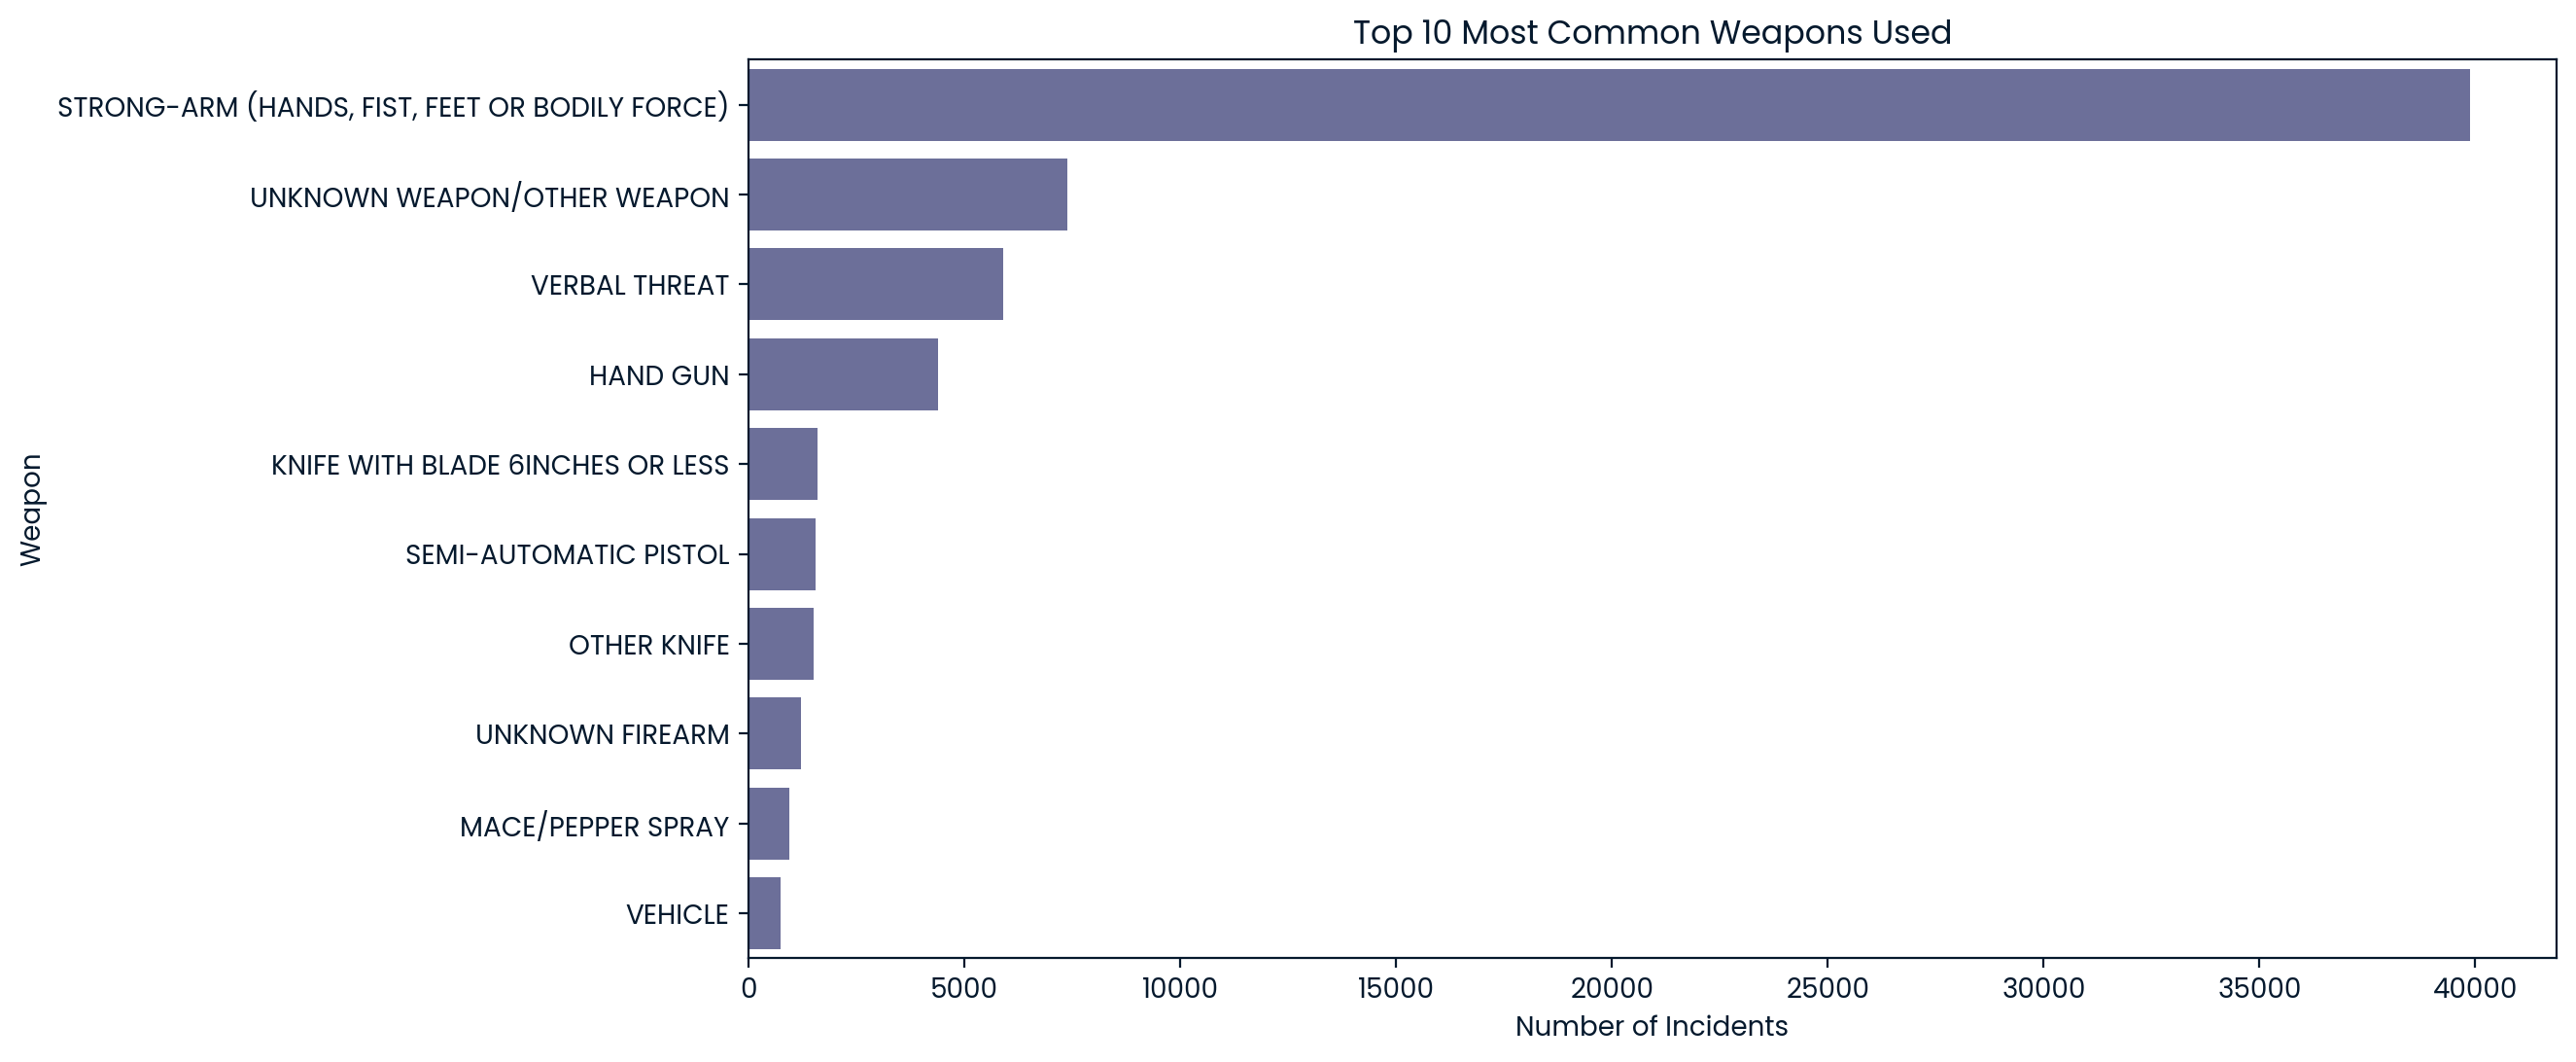

In [7]:
# Top 10 most common weapons used
top_weapons = crimes['Weapon Desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_weapons.index, x=top_weapons.values)
plt.title('Top 10 Most Common Weapons Used')
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon')
plt.show()


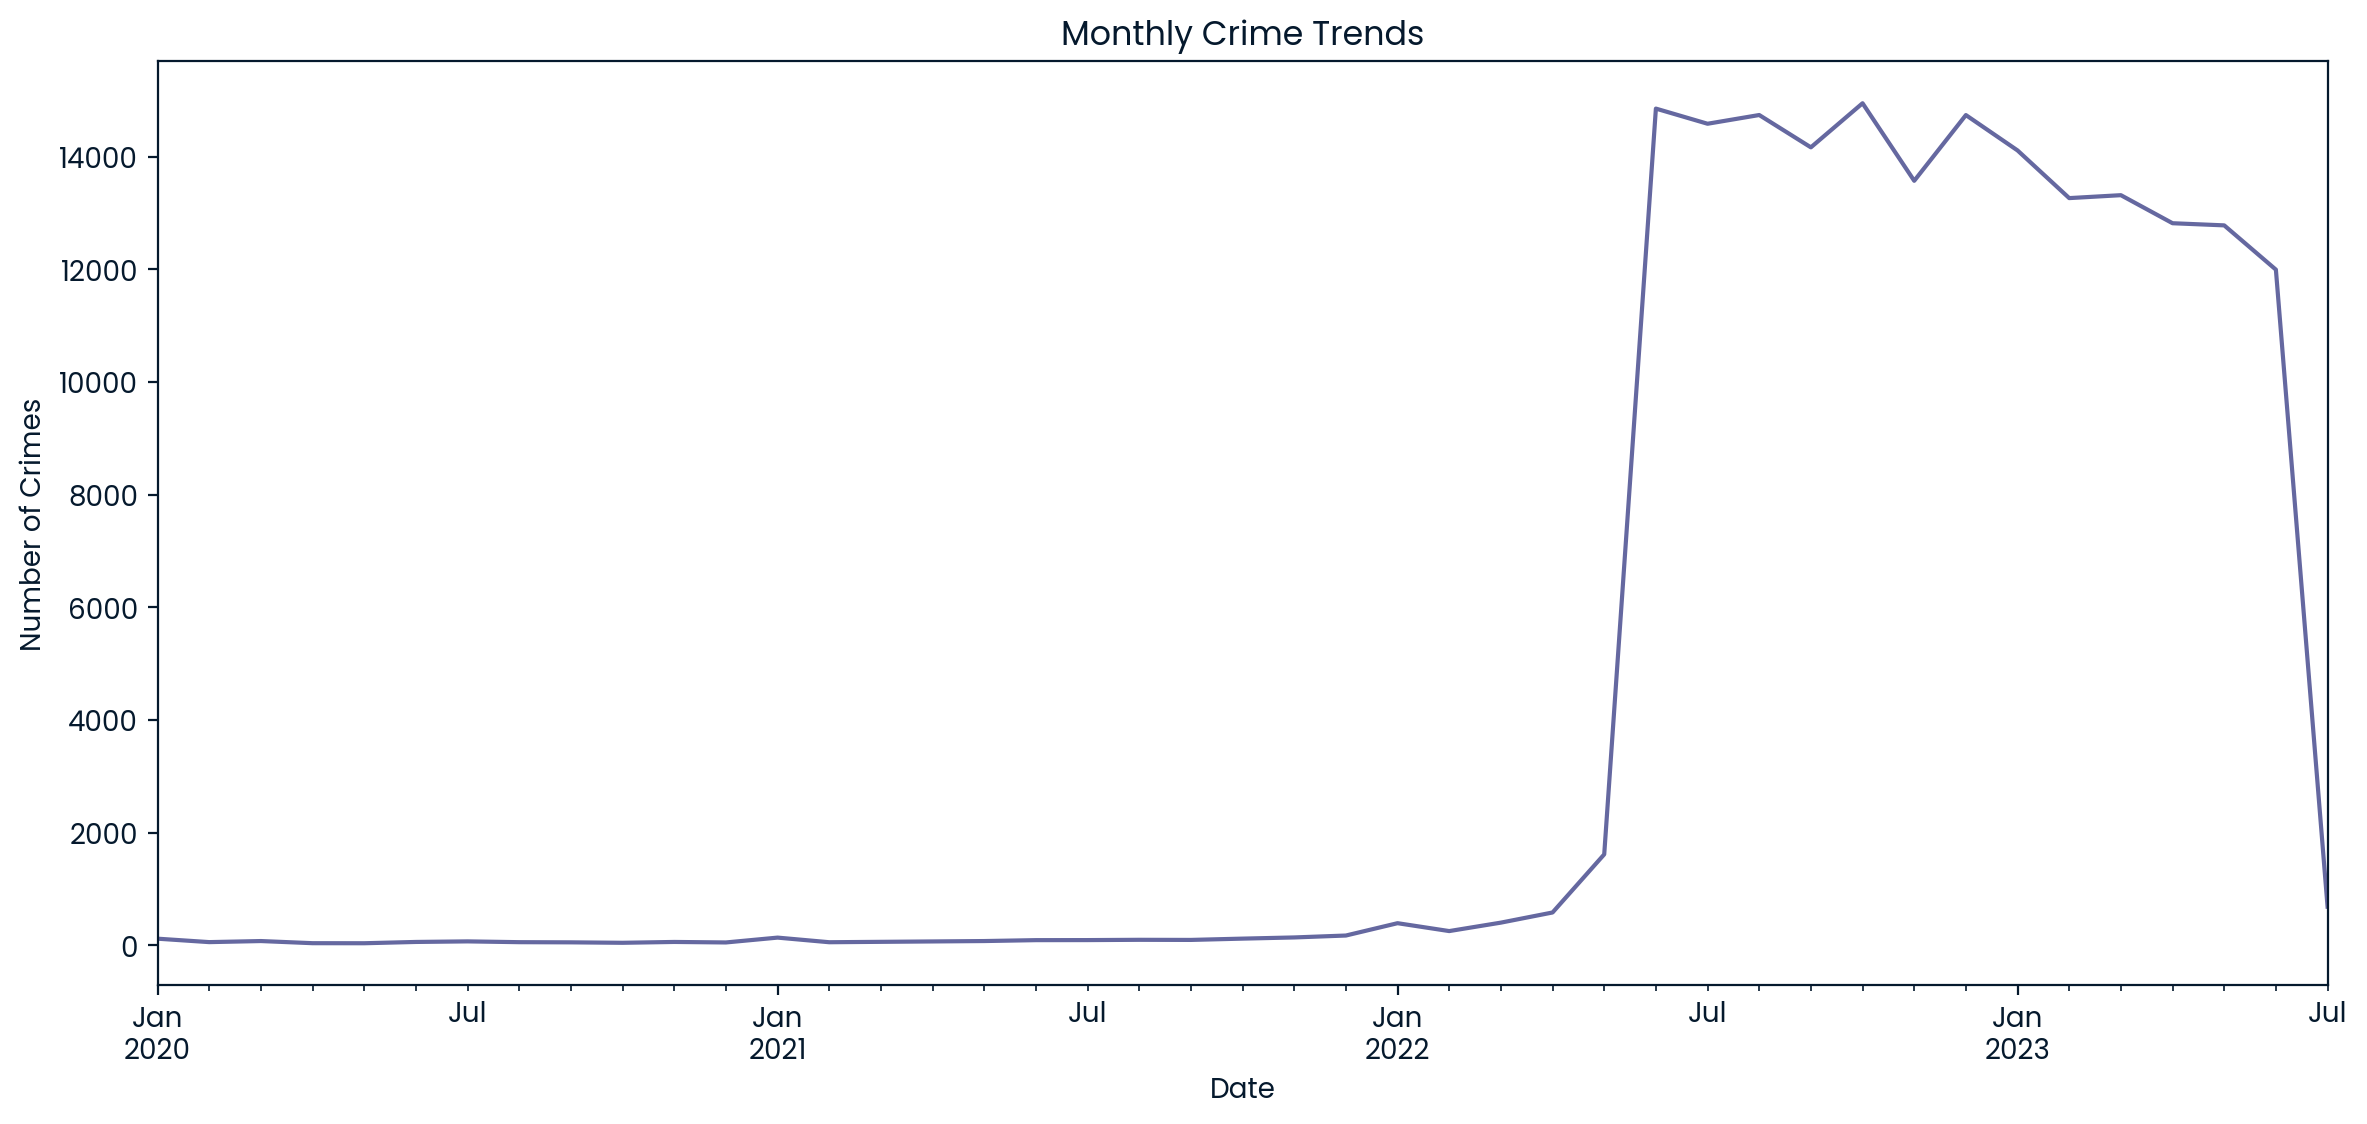

In [8]:
# Monthly trend analysis
monthly_trends = crimes.resample('M', on='DATE OCC').size()

plt.figure(figsize=(14, 6))
monthly_trends.plot()
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


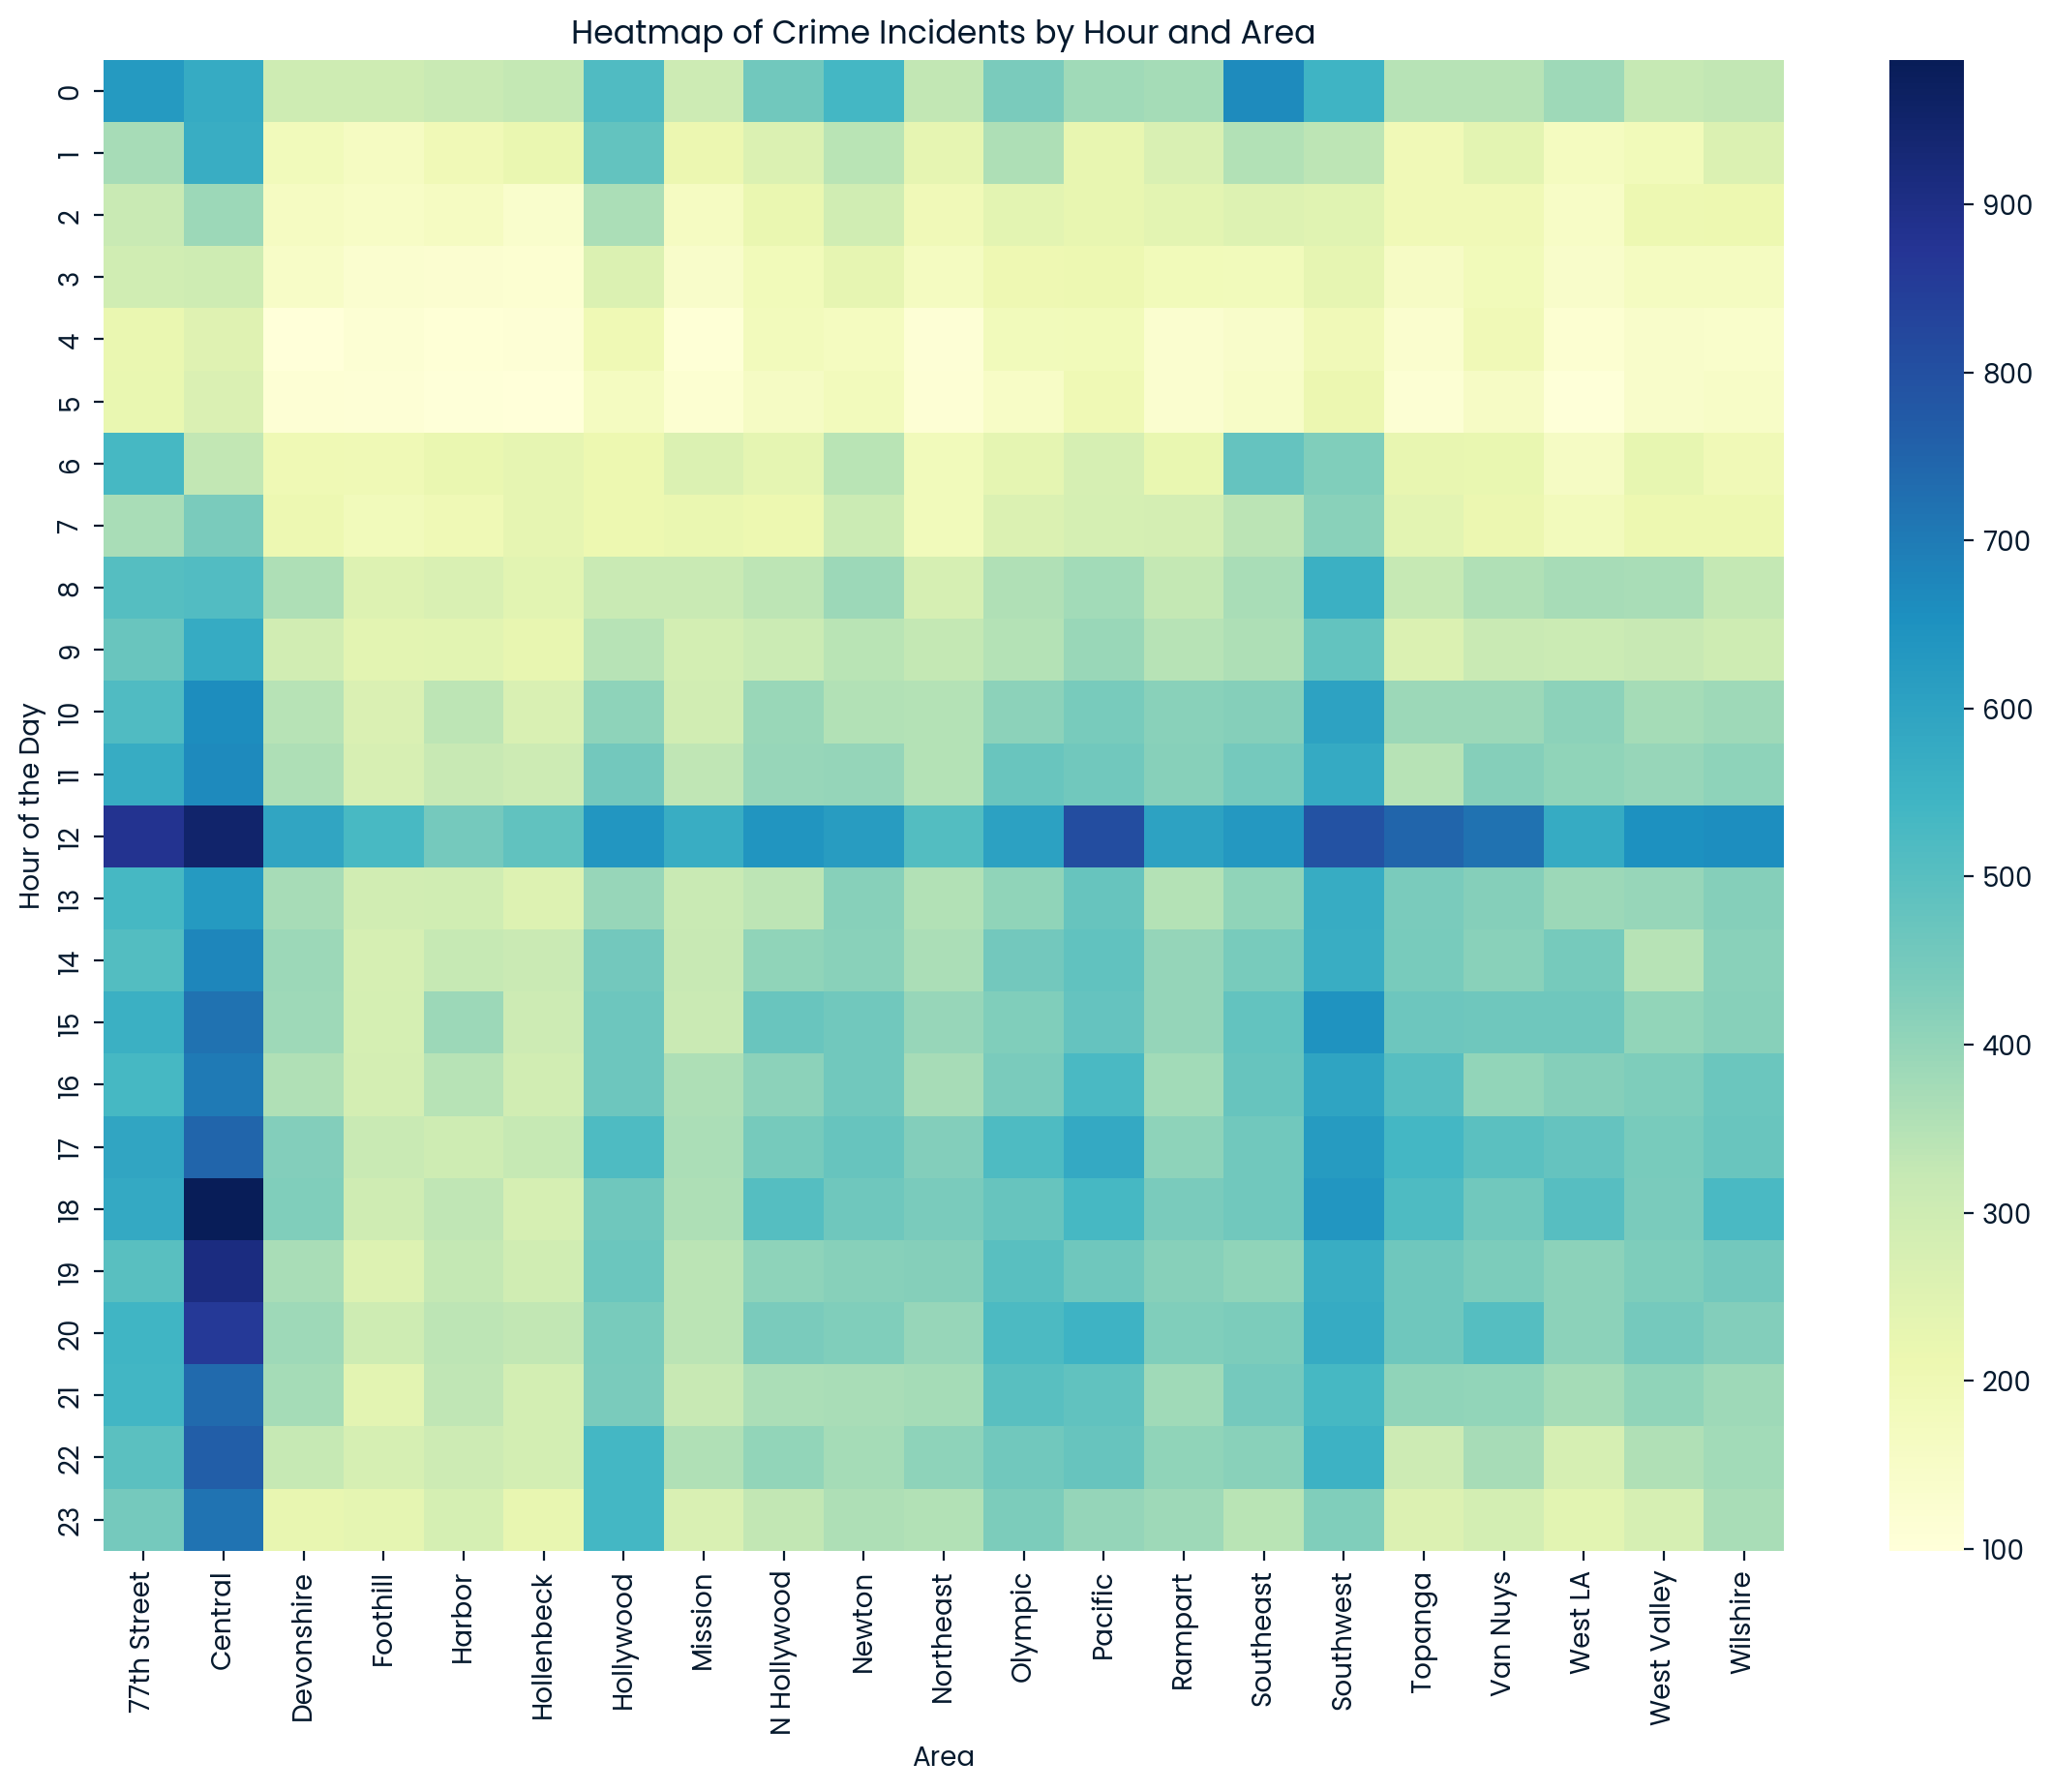

In [9]:
# Pivot table to create a matrix for hours vs areas
hour_area_matrix = crimes.pivot_table(index='Hour', columns='AREA NAME', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(hour_area_matrix, cmap="YlGnBu", annot=False)
plt.title('Heatmap of Crime Incidents by Hour and Area')
plt.xlabel('Area')
plt.ylabel('Hour of the Day')
plt.show()


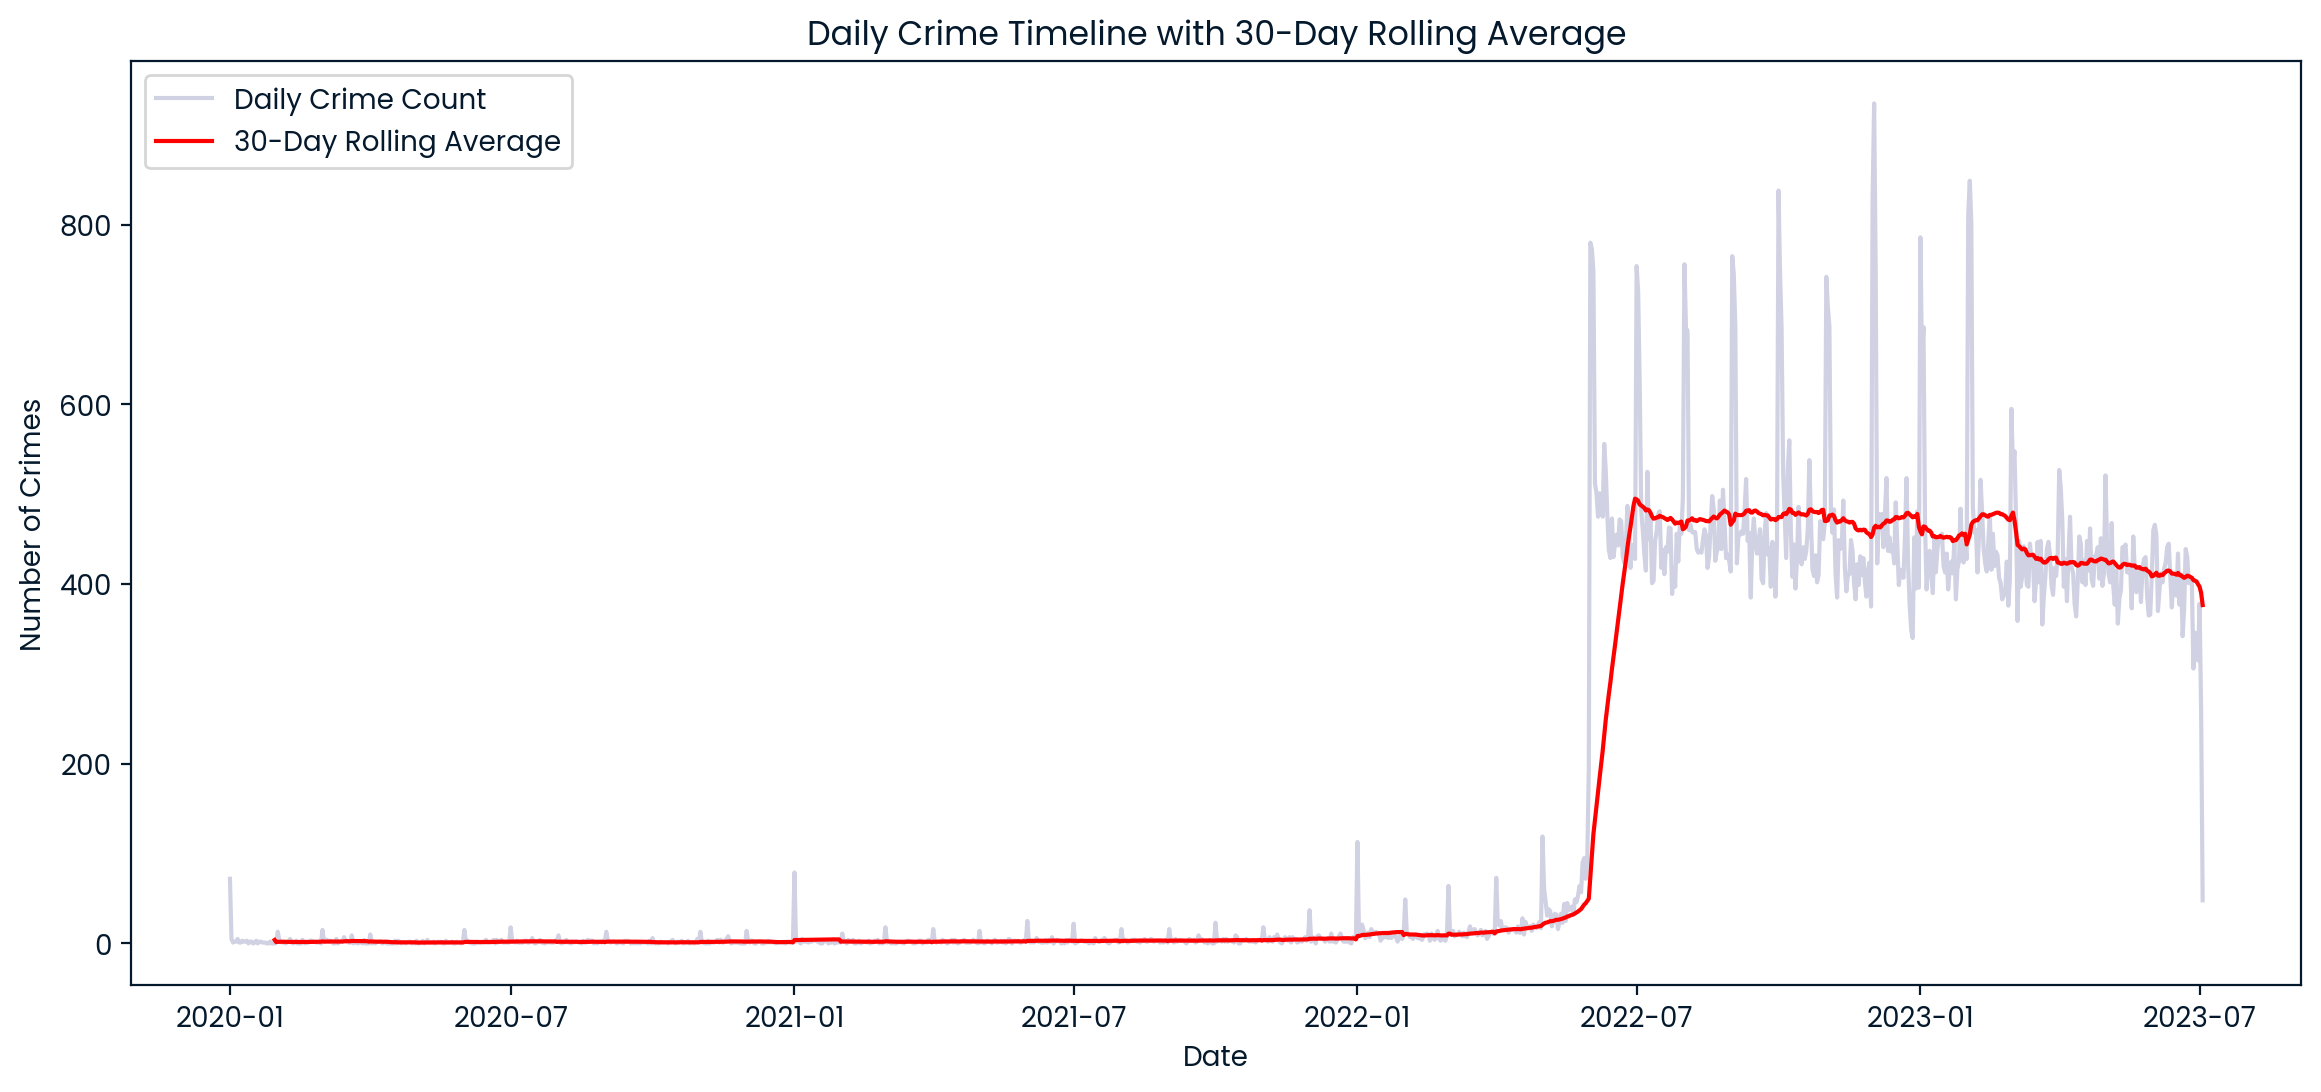

In [10]:
# Create a daily count of crimes
daily_crime_counts = crimes.set_index('DATE OCC').resample('D').size()

# Calculate rolling average for smooth trend detection
rolling_avg = daily_crime_counts.rolling(window=30).mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_crime_counts, alpha=0.3, label='Daily Crime Count')
plt.plot(rolling_avg, color='red', label='30-Day Rolling Average')
plt.title('Daily Crime Timeline with 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()


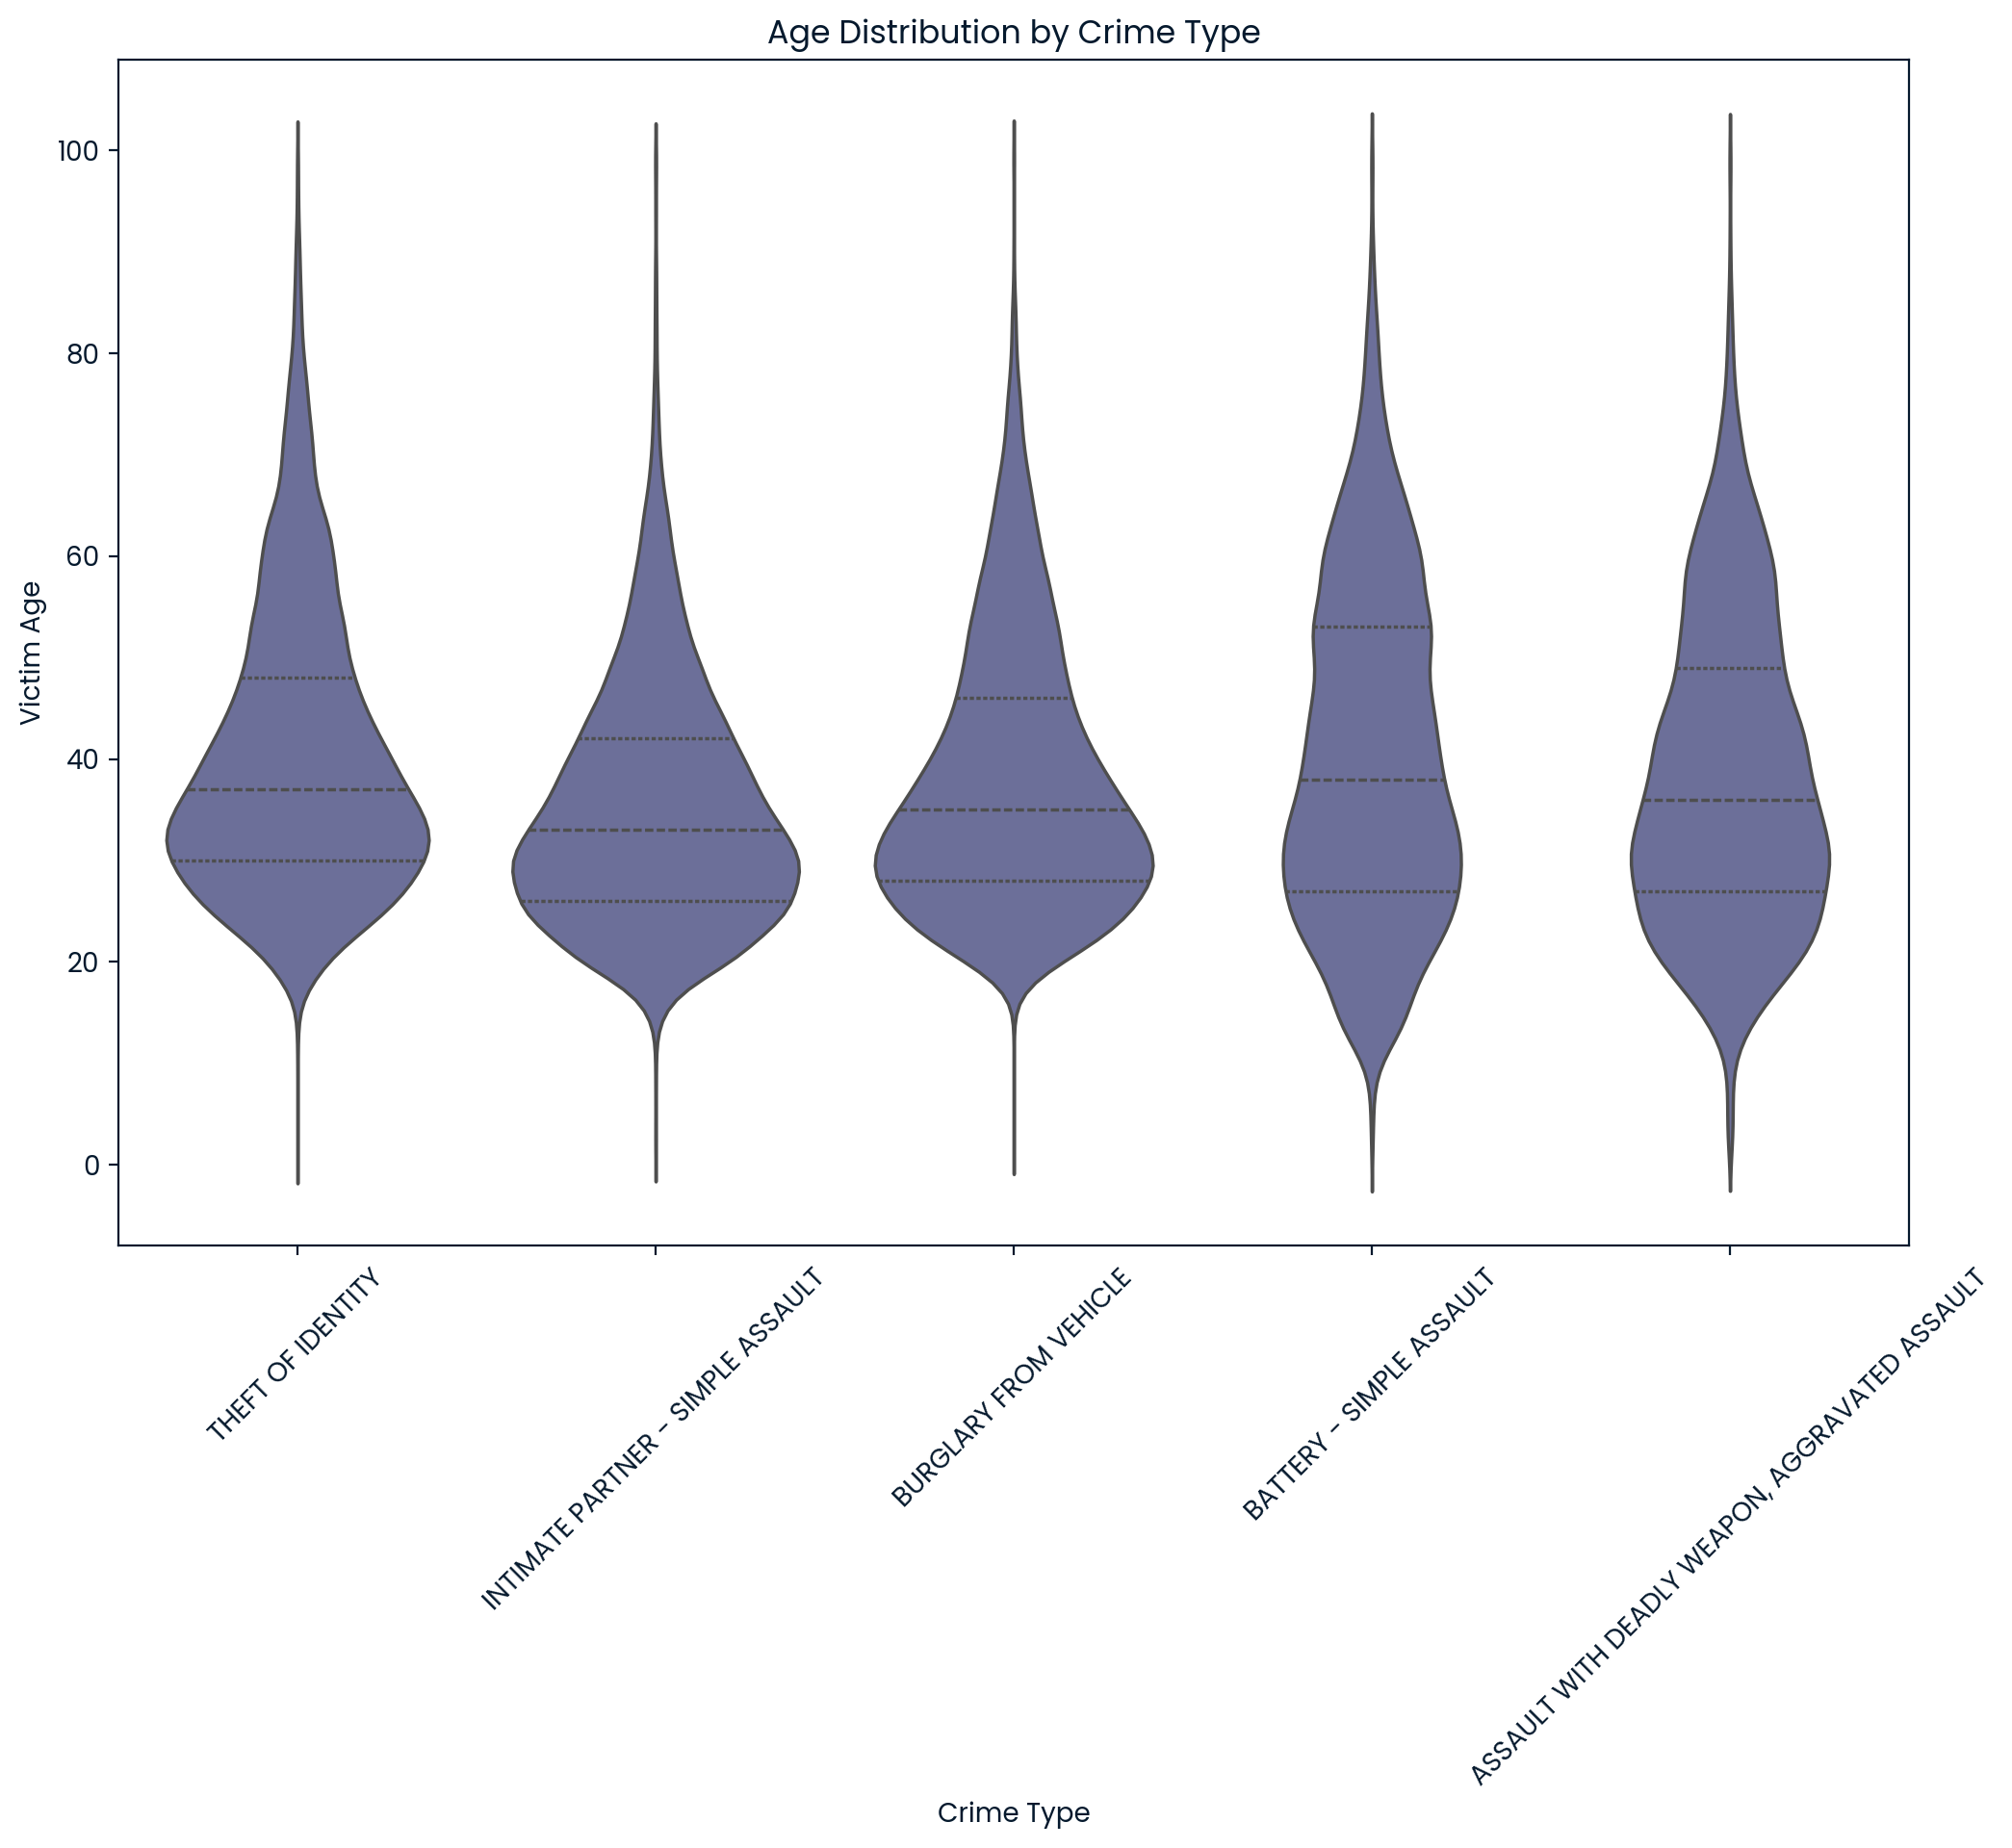

In [15]:
# Filter for top few crime types for clarity
top_crime_types = crimes['Crm Cd Desc'].value_counts().index[:5]
filtered_crimes = crimes[crimes['Crm Cd Desc'].isin(top_crime_types)]

plt.figure(figsize=(12, 8))
sns.violinplot(data=filtered_crimes, x='Crm Cd Desc', y='Vict Age', inner='quartile')
plt.title('Age Distribution by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()


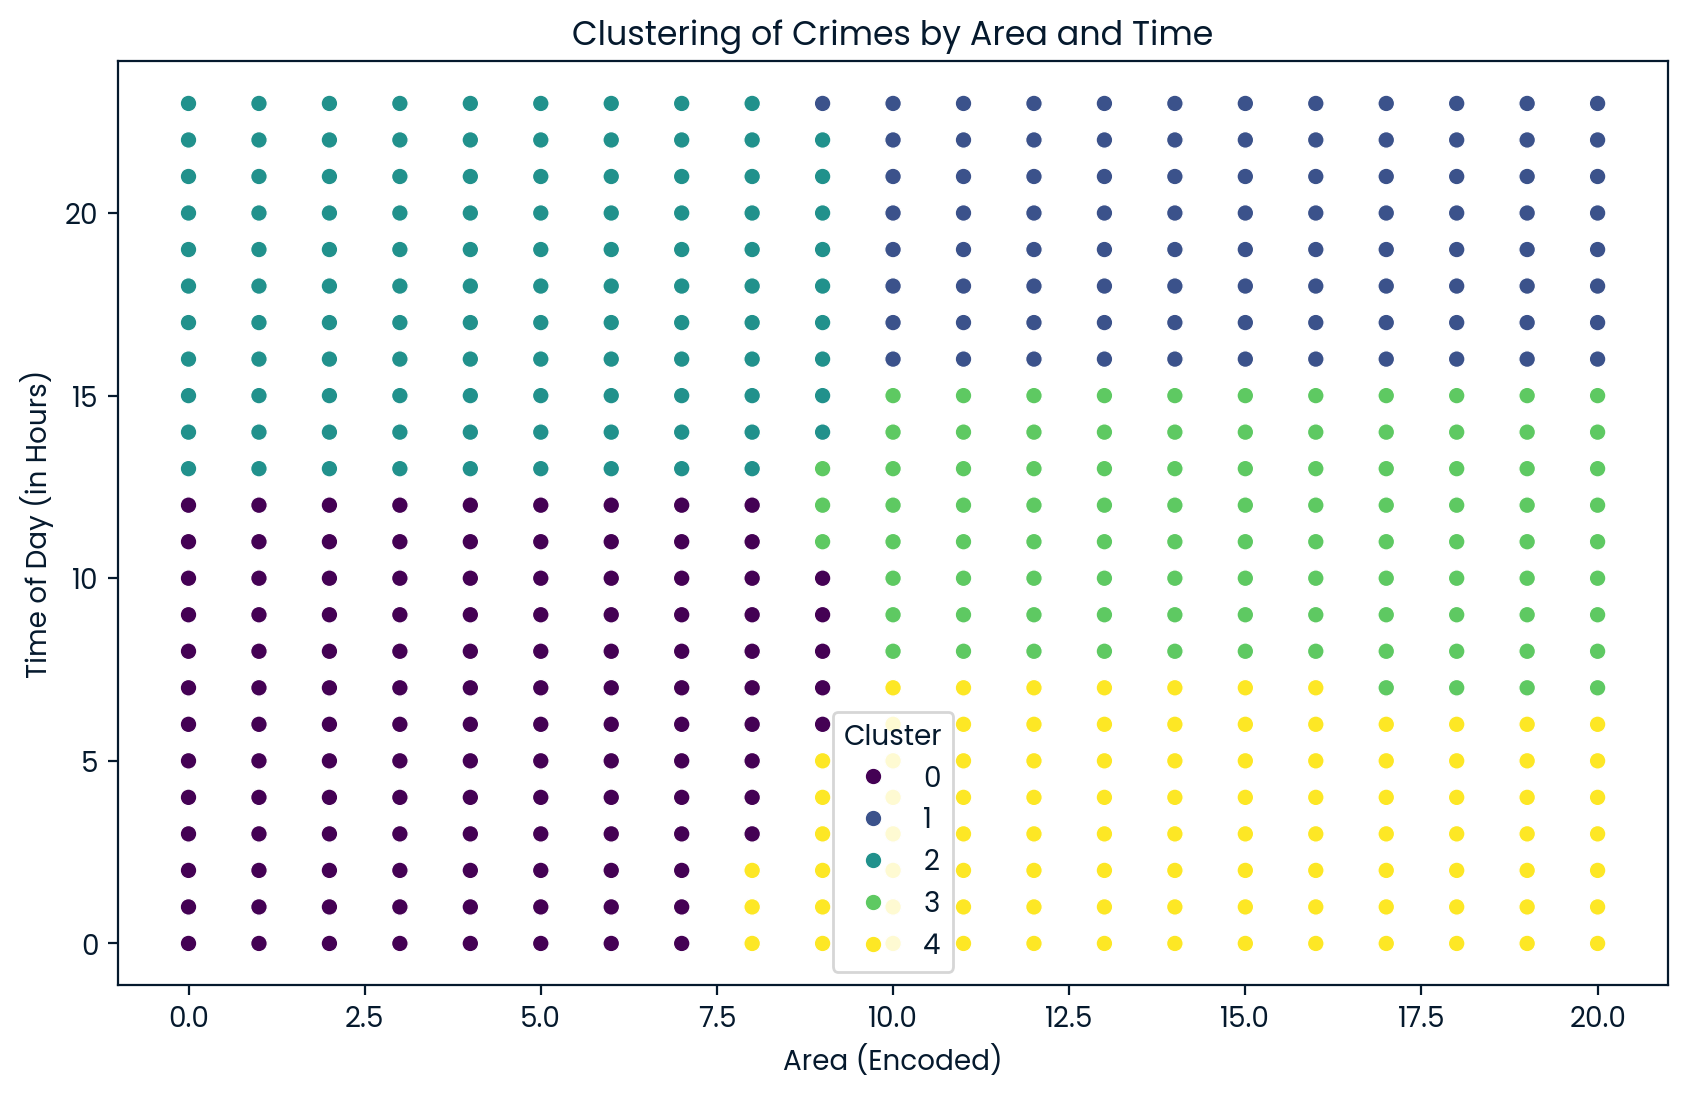

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering - using sample for location and time
crimes['Time_in_Hours'] = crimes['Hour'] + crimes['DATE OCC'].dt.minute / 60
area_time_data = crimes[['AREA NAME', 'Time_in_Hours']]

# Encode 'AREA NAME' and scale data
area_time_data['AREA_CODE'] = area_time_data['AREA NAME'].astype('category').cat.codes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(area_time_data[['AREA_CODE', 'Time_in_Hours']])

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_data)
area_time_data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=area_time_data, x='AREA_CODE', y='Time_in_Hours', hue='Cluster', palette="viridis")
plt.title('Clustering of Crimes by Area and Time')
plt.xlabel('Area (Encoded)')
plt.ylabel('Time of Day (in Hours)')
plt.show()
